# Project Name: Children Mental health Prediction 
Dataset: MICS 2019 cluster servay

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df= pd.read_csv("D:\Academic\Research\ML Data Collection\miscCSV\ch_mental_health.csv")
df.columns

Index(['UB2', 'EC1', 'EC2A', 'EC2B', 'EC2C', 'EC3A', 'EC3B', 'EC5AA', 'EC5AB',
       'EC5AX', 'EC5AY', 'EC5ANR', 'EC5BA', 'EC5BB', 'EC5BX', 'EC5BY',
       'EC5BNR', 'EC5CA', 'EC5CB', 'EC5CX', 'EC5CY', 'EC5CNR', 'EC5DA',
       'EC5DB', 'EC5DX', 'EC5DY', 'EC5DNR', 'EC5EA', 'EC5EB', 'EC5EX', 'EC5EY',
       'EC5ENR', 'EC11', 'EC12', 'EC13', 'EC14', 'EC15', 'UCD2A', 'UCD2B',
       'UCD2C', 'UCD2D', 'UCD2E', 'UCD2F', 'UCD2G', 'UCD2H', 'UCD2I', 'UCD2J',
       'UCD2K', 'UCD3', 'UCD5', 'UCF15', 'UCF16', 'UCF17', 'UCF18', 'UCF19',
       'BD2', 'AN4', 'AN8', 'HH6', 'HH7', 'HL4', 'windex5', 'melevel',
       'cdisability'],
      dtype='object')

In [4]:
#df=dataLoad.drop(['Unnamed: 0'], axis=1)

In [5]:
"""
df.columns=['Age of woman','Currently married','Age of husband','Husband has more wives','Children dead','Children ever born',
           'Received prenatal care','Times received prenatal care','Blood pressure','Urine sample','Blood sample',
           'Has own immunization card','Tetanus toxoid injection taken','New born birth weight','Using method to avoid pregnancy',
           'Estimation of happiness','Area','Sex of newborn','Wealth index','Education level']
           """

"\ndf.columns=['Age of woman','Currently married','Age of husband','Husband has more wives','Children dead','Children ever born',\n           'Received prenatal care','Times received prenatal care','Blood pressure','Urine sample','Blood sample',\n           'Has own immunization card','Tetanus toxoid injection taken','New born birth weight','Using method to avoid pregnancy',\n           'Estimation of happiness','Area','Sex of newborn','Wealth index','Education level']\n           "

In [6]:
df.head(5)

UB2    EC1 EC2A EC2B EC2C  EC3A  EC3B EC5AA EC5AB EC5AX EC5AY EC5ANR EC5BA  \
0  4.0   NONE  YES  YES  YES  NONE  NONE     A     B                        A   
1  1.0   NONE   NO  YES   NO  NONE  NONE                                        
2  3.0    ONE  YES  YES  YES  NONE  NONE     A     B                        A   
3  3.0   FOUR   NO  YES   NO  NONE  NONE     A     B     X                      
4  4.0  THREE   NO  YES   NO  NONE  NONE     A                              A   

  EC5BB EC5BX EC5BY EC5BNR EC5CA EC5CB EC5CX EC5CY EC5CNR EC5DA EC5DB EC5DX  \
0     B                        A     B                              B     X   
1                                                                             
2     B                                          Y            A     B         
3           X                  A           X                              X   
4                              A                                    B         

  EC5DY EC5DNR EC5EA EC5EB EC5EX EC5EY EC5ENR EC11 EC12 EC13 EC14 EC15 UCD2A  \
0                              X               YES  YES  YES   NO  YES    NO   
1                                              NaN  NaN  NaN  NaN  NaN    NO   
2                              X               YES  YES  YES   NO  YES    NO   
3                  A     B     X               YES  YES  YES  YES  YES    NO   
4                                    Y         YES  YES  YES   NO  YES   YES   

  UCD2B UCD2C UCD2D UCD2E UCD2F UCD2G UCD2H UCD2I UCD2J UCD2K UCD3 UCD5  \
0    NO    NO   YES    NO    NO    NO   YES    NO    NO    NO   NO  YES   
1    NO   YES   YES    NO   YES    NO    NO    NO    NO    NO   NO   NO   
2    NO    NO    NO    NO    NO    NO    NO    NO    NO    NO   NO  YES   
3   YES   YES   YES   YES    NO    NO    NO    NO    NO    NO   NO   NO   
4   YES    NO    NO    NO    NO    NO    NO    NO    NO    NO   NO   NO   

           UCF15          UCF16          UCF17          UCF18       UCF19  \
0  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NOT AT ALL   
1            NaN            NaN            NaN            NaN         NaN   
2  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NOT AT ALL   
3  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY    THE SAME   
4  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NOT AT ALL   

   BD2  AN4   AN8    HH6       HH7     HL4  windex5            melevel  \
0  NaN  4.0  16.3  URBAN  Barishal    MALE  Richest  Higher secondary+   
1  YES  1.0   7.8  URBAN  Barishal    MALE   Middle  Higher secondary+   
2  NaN  3.0   9.8  URBAN  Barishal  FEMALE   Fourth            Primary   
3  NaN  3.0  14.7  URBAN  Barishal    MALE  Richest  Higher secondary+   
4  NaN  4.0  13.0  URBAN  Barishal  FEMALE  Richest  Higher secondary+   

                    cdisability  
0  Has no functional difficulty  
1                           NaN  
2  Has no functional difficulty  
3  Has no functional difficulty  
4  Has no functional difficulty

In [7]:
df.shape

(24686, 64)

# Missing Values

In [8]:
df.isnull().sum().sum()

248680

In [9]:
# percent of data that is missing per column
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
percent_missing[0:10]

EC11           61.698939
EC12           61.698939
EC15           61.698939
EC14           61.698939
EC13           61.698939
BD2            44.721705
cdisability    43.056793
UCF19          43.052742
UCF18          43.052742
UCF17          43.052742
dtype: float64

In [10]:
percent_missing= (df['UCF17'].isnull().sum() * 100 / len(df['UCF17']))
percent_missing

43.05274244511059

In [11]:
# Below code gives percentage of null in every column
null_percentage = df.isnull().sum()/df.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>50].keys()

In [12]:
col_to_drop

Index(['EC11', 'EC12', 'EC13', 'EC14', 'EC15'], dtype='object')

In [13]:
#df1 = df.drop(col_to_drop, axis=1)
df1 = df.loc[df['UCF17'].notnull()] 
df1.shape

(14058, 64)

# Uniqe values in each features

In [14]:
count=0
for col in df1.columns:
    print(col)
    print(df1[col].unique())

UB2
[4. 3. 2.]
EC1
['NONE' 'ONE' 'FOUR' 'THREE' 'TWO' 'SIX' 'FIVE' 'SEVEN' 'EIGHT'
 'TEN OR MORE BOOKS' 'NINE' 'NO RESPONSE']
EC2A
['YES' 'NO' 'DK']
EC2B
['YES' 'NO' 'NO RESPONSE' 'DK']
EC2C
['YES' 'NO' 'DK']
EC3A
['NONE' 'SEVEN' 'FIVE' 'FOUR' 'TWO' 'ONE' 'SIX' 'THREE' 'DK']
EC3B
['NONE' 'SEVEN' 'FOUR' 'FIVE' 'SIX' 'ONE' 'THREE' 'TWO' 'DK']
EC5AA
['A' ' ' '?']
EC5AB
['B' ' ' '?']
EC5AX
[' ' 'X' '?']
EC5AY
[' ' 'Y' '?']
EC5ANR
[' ' '?']
EC5BA
['A' ' ' '?']
EC5BB
['B' ' ' '?']
EC5BX
[' ' 'X' '?']
EC5BY
[' ' 'Y' '?']
EC5BNR
[' ' '?']
EC5CA
['A' ' ' '?']
EC5CB
['B' ' ' '?']
EC5CX
[' ' 'X' '?']
EC5CY
[' ' 'Y' '?']
EC5CNR
[' ' '?']
EC5DA
[' ' 'A' '?']
EC5DB
['B' ' ' '?']
EC5DX
['X' ' ' '?']
EC5DY
[' ' 'Y' '?']
EC5DNR
[' ' '?']
EC5EA
[' ' 'A' '?']
EC5EB
[' ' 'B' '?']
EC5EX
['X' ' ' '?']
EC5EY
[' ' 'Y' '?']
EC5ENR
[' ' '?']
EC11
['YES' nan 'NO' 'NO RESPONSE' 'DK']
EC12
['YES' nan 'NO' 'DK']
EC13
['YES' nan 'NO']
EC14
['NO' 'YES' nan 'DK']
EC15
['YES' nan 'NO' 'DK' 'NO RESPONSE']
UCD2A
['NO' 'Y

In [15]:
#df1 = df.drop("MN34", axis=1)

In [16]:
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        print(col)
        df1.drop(col,inplace=True,axis=1)
df1.shape

(14058, 64)

# Datatype of each features

In [17]:
from pandas.api.types import infer_dtype

for column in df1.columns:
    print(column,':',infer_dtype(df1[column]))

UB2 : floating
EC1 : string
EC2A : string
EC2B : string
EC2C : string
EC3A : string
EC3B : string
EC5AA : string
EC5AB : string
EC5AX : string
EC5AY : string
EC5ANR : string
EC5BA : string
EC5BB : string
EC5BX : string
EC5BY : string
EC5BNR : string
EC5CA : string
EC5CB : string
EC5CX : string
EC5CY : string
EC5CNR : string
EC5DA : string
EC5DB : string
EC5DX : string
EC5DY : string
EC5DNR : string
EC5EA : string
EC5EB : string
EC5EX : string
EC5EY : string
EC5ENR : string
EC11 : string
EC12 : string
EC13 : string
EC14 : string
EC15 : string
UCD2A : string
UCD2B : string
UCD2C : string
UCD2D : string
UCD2E : string
UCD2F : string
UCD2G : string
UCD2H : string
UCD2I : string
UCD2J : string
UCD2K : string
UCD3 : string
UCD5 : string
UCF15 : string
UCF16 : string
UCF17 : string
UCF18 : string
UCF19 : string
BD2 : string
AN4 : floating
AN8 : floating
HH6 : string
HH7 : string
HL4 : string
windex5 : string
melevel : string
cdisability : string


In [18]:
for column in df1.columns:
    if(infer_dtype(df1[column])=="mixed"):
        df1[column]=pd.to_numeric(df1[column],errors='coerce')
        df1[column] = df1[column].apply(lambda elt: str(int(elt)) if isinstance(elt, float) else str(elt))

In [19]:
#df1['Times received prenatal care'] = df1['Times received prenatal care'].astype(int)

# Description

In [20]:
import numpy as np

numeric_features = df1.select_dtypes(include=[np.number])
numeric_features.describe()

UB2           AN4           AN8
count  14058.000000  14058.000000  14058.000000
mean       3.003343      3.003343     15.729400
std        0.811318      0.811318     15.562619
min        2.000000      2.000000      1.100000
25%        2.000000      2.000000     11.300000
50%        3.000000      3.000000     12.800000
75%        4.000000      4.000000     14.500000
max        4.000000      4.000000     99.900000

In [21]:
categorical_features = df1.select_dtypes(exclude=[np.number])
categorical_features.describe()

EC1   EC2A   EC2B   EC2C   EC3A   EC3B  EC5AA  EC5AB  EC5AX  EC5AY  \
count   14058  14058  14058  14058  14058  14058  14058  14058  14058  14058   
unique     12      3      4      3      9      9      3      3      3      3   
top      NONE     NO    YES    YES   NONE   NONE      A                        
freq     8017   8332  12209  11565  12401  12839   8108  11843  11373   8966   

       EC5ANR  EC5BA  EC5BB  EC5BX  EC5BY EC5BNR  EC5CA  EC5CB  EC5CX  EC5CY  \
count   14058  14058  14058  14058  14058  14058  14058  14058  14058  14058   
unique      2      3      3      3      3      2      3      3      3      3   
top                A                                  A                        
freq    14053   8333  11813  10728   9454  14052   7188  12371  11419   8147   

       EC5CNR  EC5DA  EC5DB  EC5DX  EC5DY EC5DNR  EC5EA  EC5EB  EC5EX  EC5EY  \
count   14058  14058  14058  14058  14058  14058  14058  14058  14058  14058   
unique      2      3      3      3      3      2      3      3      3      3   
top                A                                                           
freq    14053   7151   8968   9486  10116  14054   9350  12258   8590   8585   

       EC5ENR  EC11  EC12  EC13  EC14  EC15  UCD2A  UCD2B  UCD2C  UCD2D  \
count   14058  9455  9455  9455  9455  9455  14058  14058  14058  14058   
unique      2     4     3     2     3     4      3      3      3      3   
top             YES   YES   YES    NO   YES     NO    YES     NO    YES   
freq    14056  8159  8067  8970  6024  5388   7272   9358   7948  12147   

        UCD2E  UCD2F  UCD2G  UCD2H  UCD2I  UCD2J  UCD2K   UCD3   UCD5  \
count   14058  14058  14058  14058  14058  14058  14058  14058  10724   
unique      3      3      3      2      3      2      3      2      4   
top       YES     NO     NO     NO     NO     NO     NO    YES     NO   
freq     8551   7227  11854  10708   9312   7418  13391   9691   6920   

                UCF15          UCF16          UCF17          UCF18  \
count           14058          14058          14058          14058   
unique              5              5              5              5   
top     NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY  NO DIFFICULTY   
freq            13769          13595          13179          13726   

             UCF19   BD2    HH6         HH7    HL4  windex5    melevel  \
count        14058  4603  14058       14058  14058    14058      14058   
unique           6     3      2           8      2        6          4   
top     NOT AT ALL   YES  RURAL  Chattogram   MALE  Poorest  Secondary   
freq          7625  4161  11473        2941   7299     3579       6831   

                         cdisability  
count                          14057  
unique                             2  
top     Has no functional difficulty  
freq                           13684

# Exploratory Data Analysis

## Univariate Analysis

In [220]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>1]


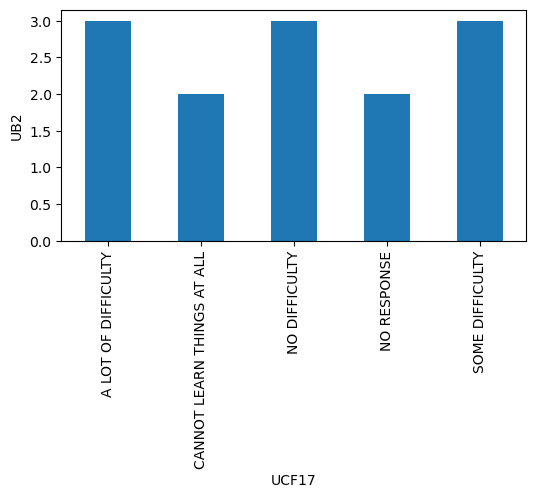

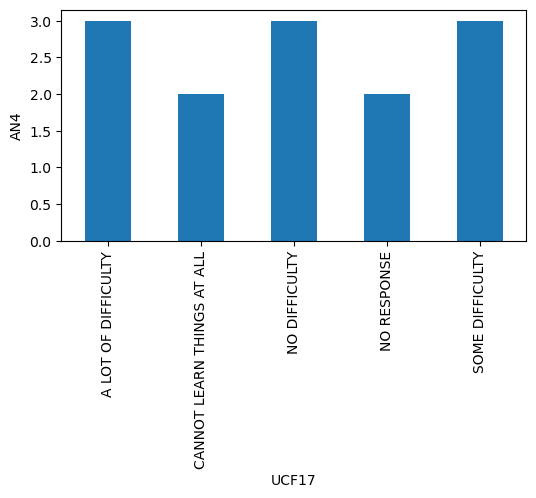

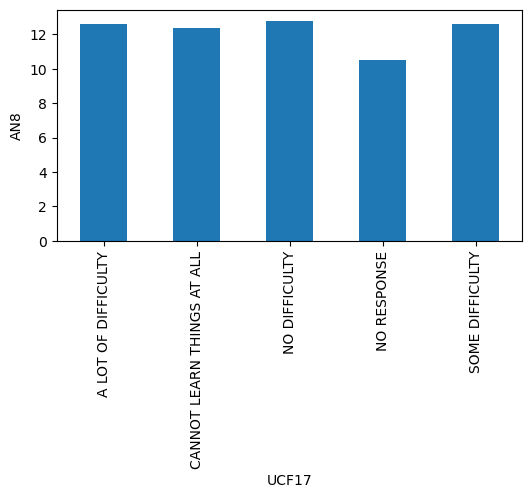

In [22]:
for feature in numeric_features.columns:
    #calculate sum of values by group
    df_groups = df1.groupby('UCF17')[feature].median()
    #create bar plot by group
    df_groups.plot(kind='bar', title='',
               ylabel=feature, xlabel='UCF17', figsize=(6, 3))
    plt.show()
    

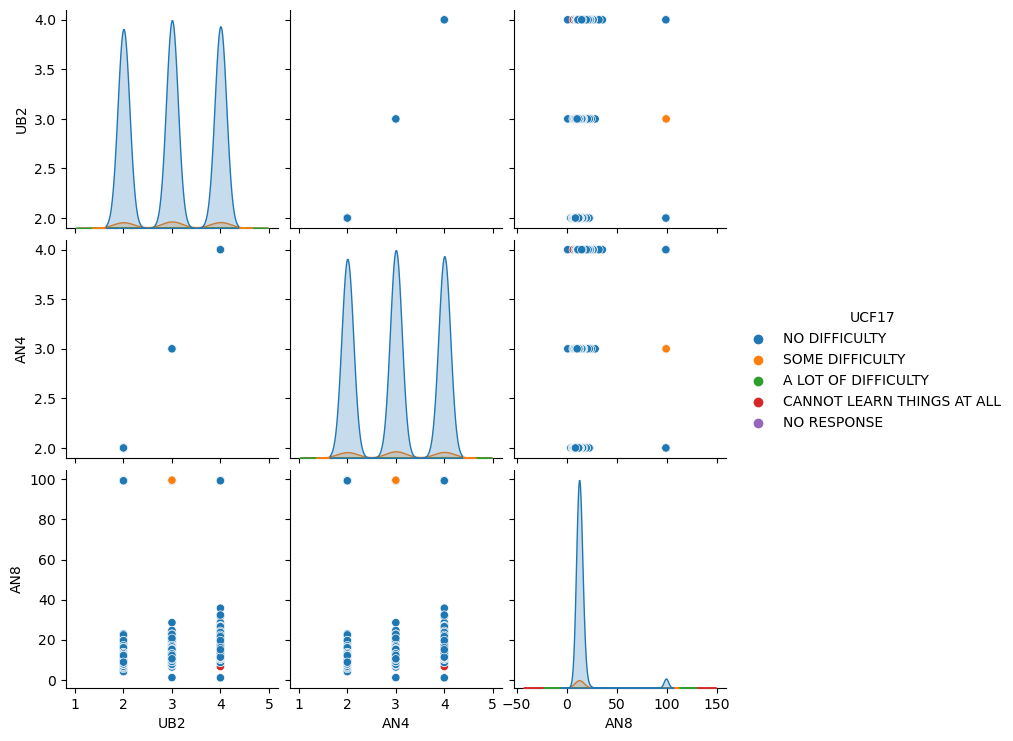

In [23]:

sns.pairplot(df1, hue='UCF17')

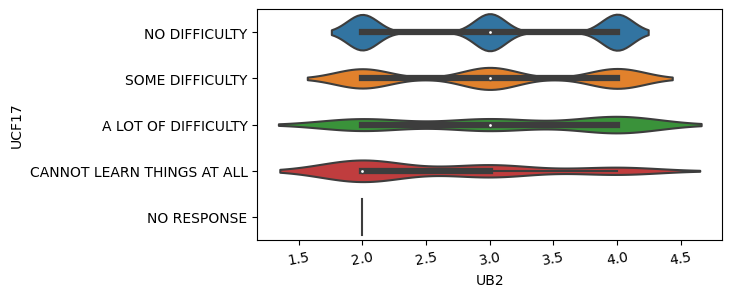

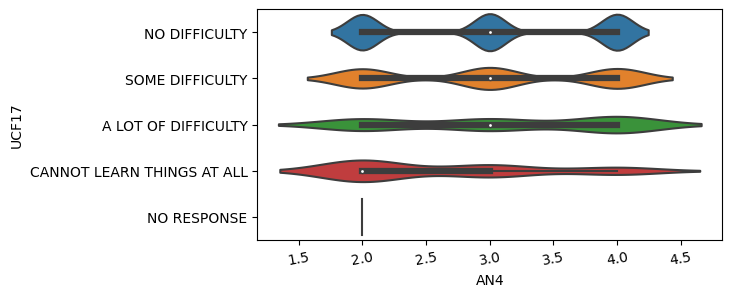

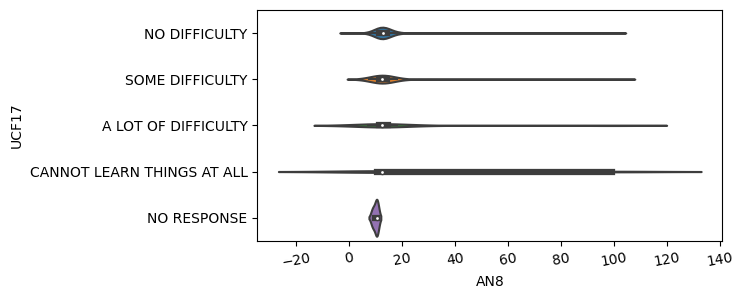

In [25]:
for column in numeric_features.columns:
    plt.figure(figsize=(6,3))
    sns.violinplot(data=df, x=column, y="UCF17")
    plt.xticks(rotation = 10)
    plt.show()

In [26]:
"""
for column in numeric_features.columns:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=column, y='LS1', data=df1)
    plt.xticks(rotation = 10)
    plt.show()
"""

"\nfor column in numeric_features.columns:\n    plt.figure(figsize=(6,3))\n    sns.scatterplot(x=column, y='LS1', data=df1)\n    plt.xticks(rotation = 10)\n    plt.show()\n"

### Categorical Data

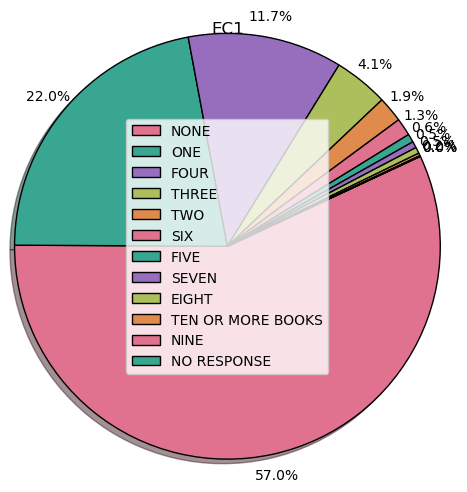

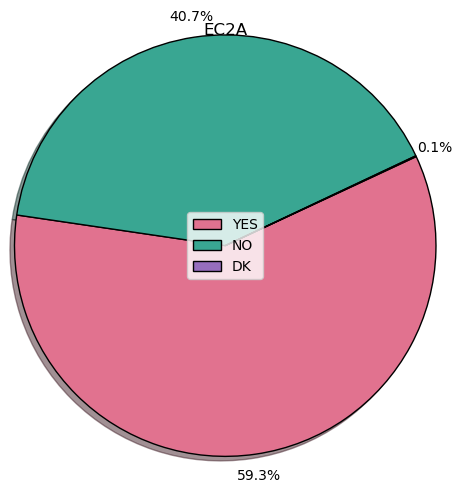

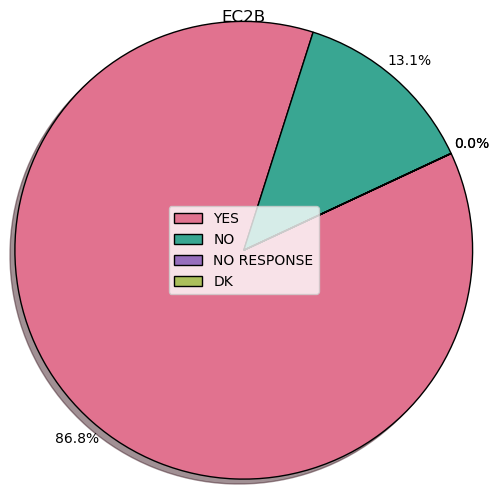

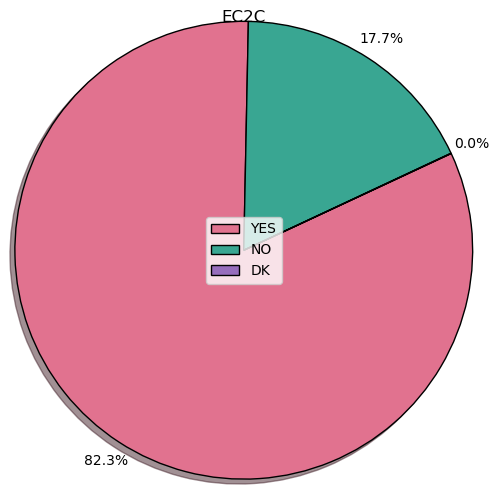

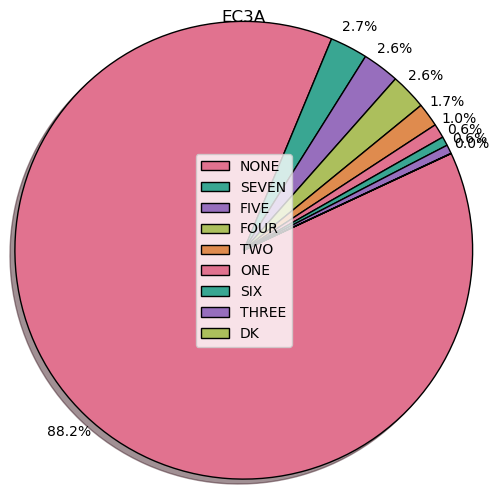

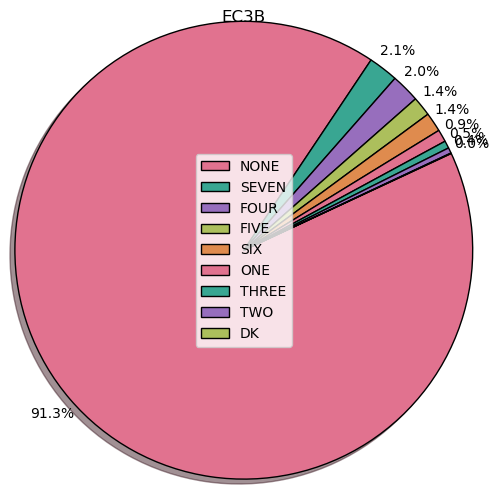

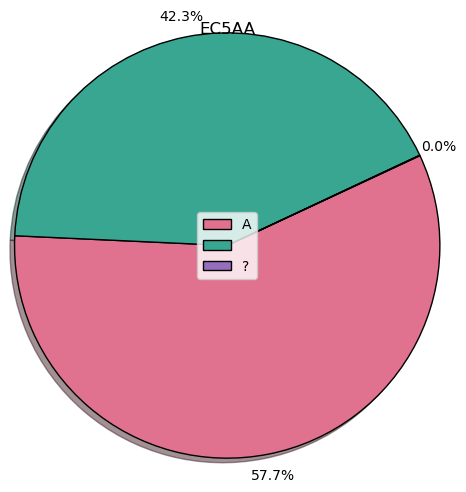

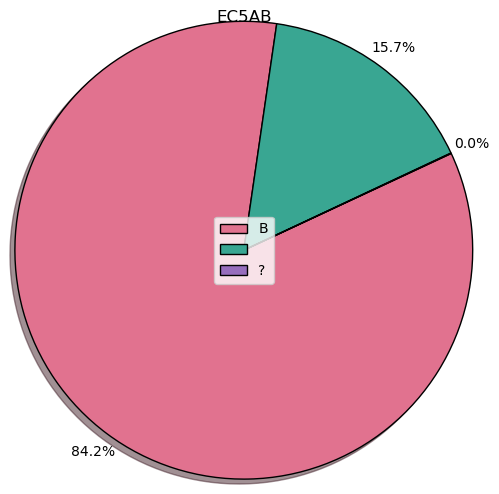

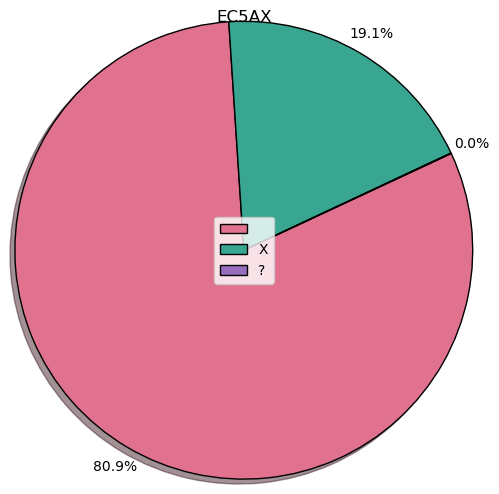

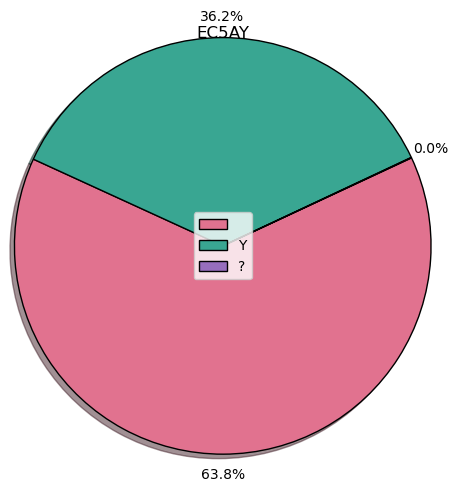

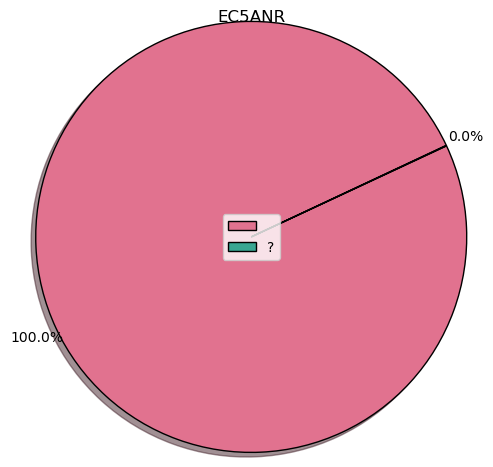

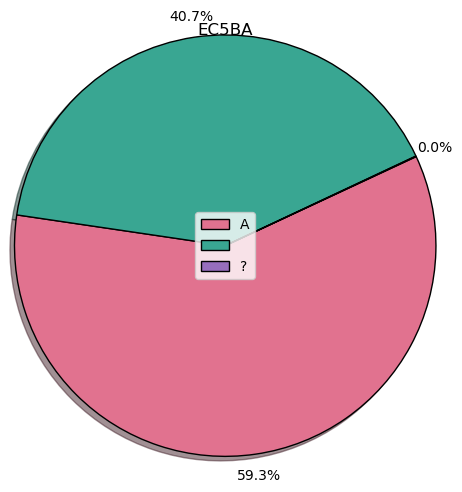

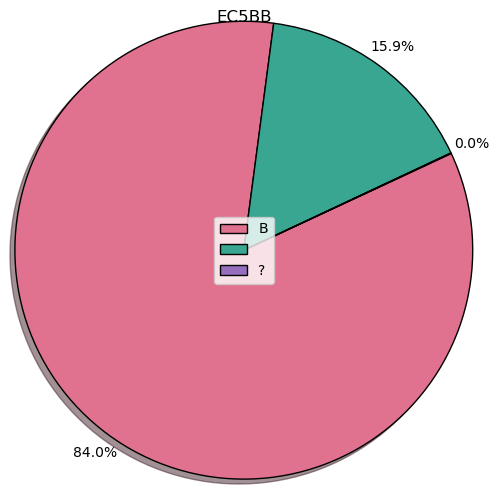

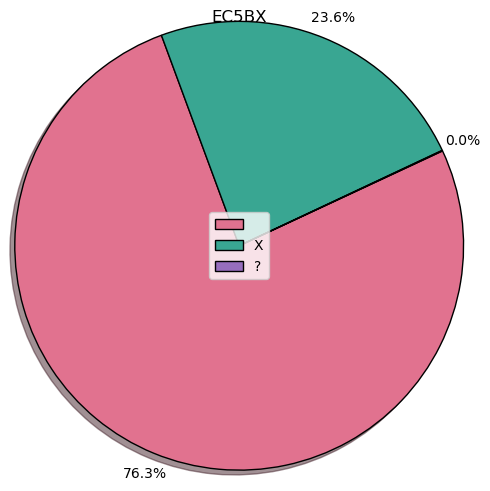

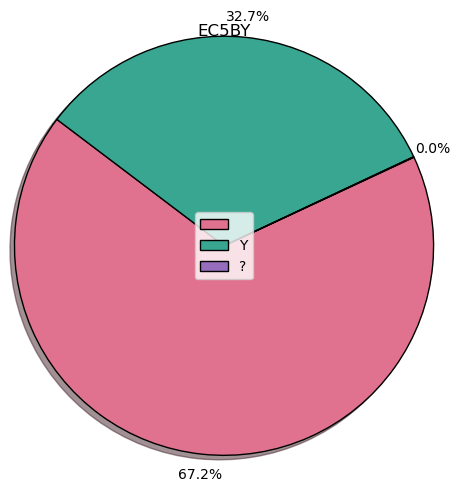

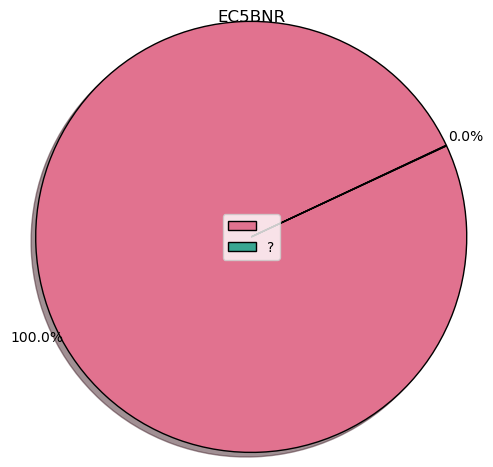

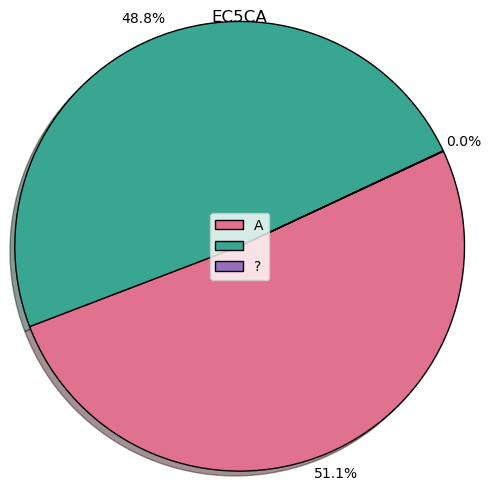

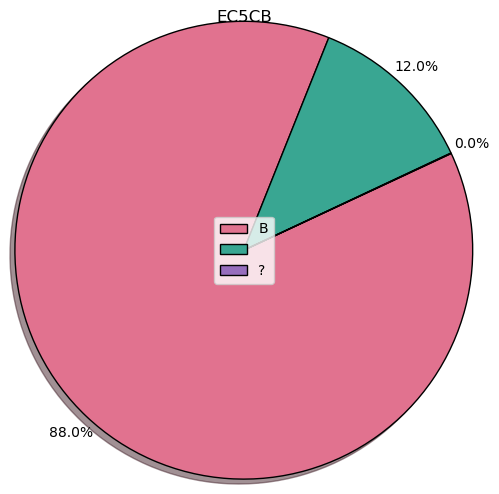

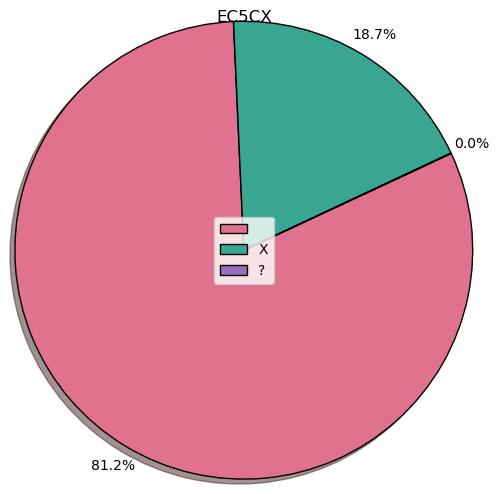

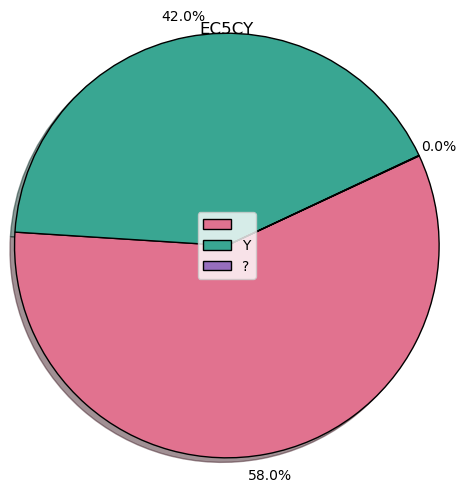

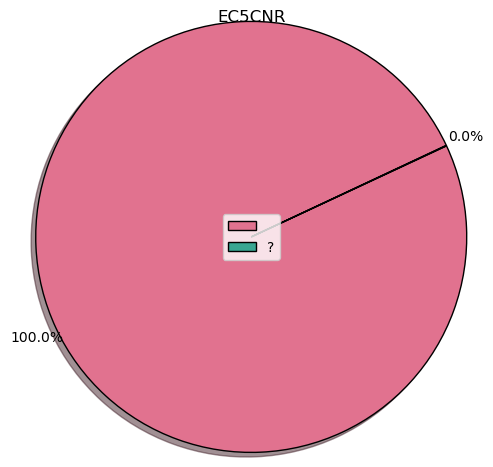

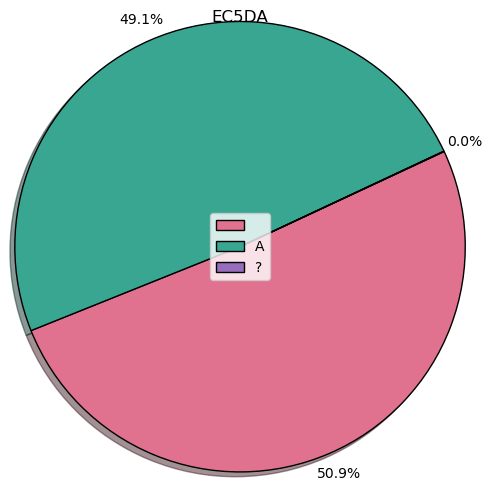

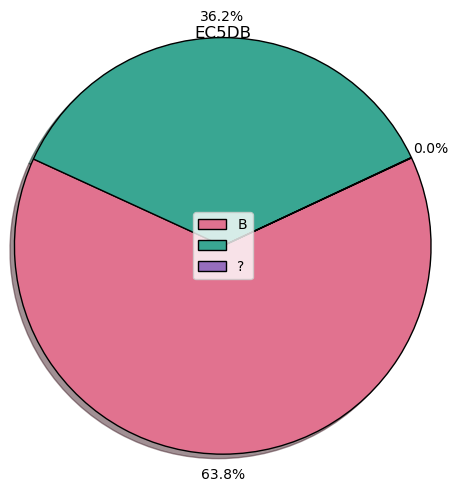

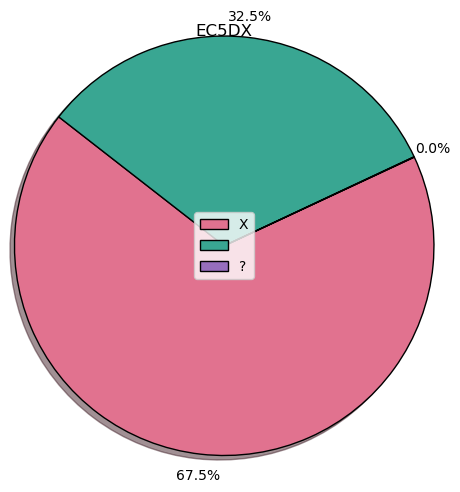

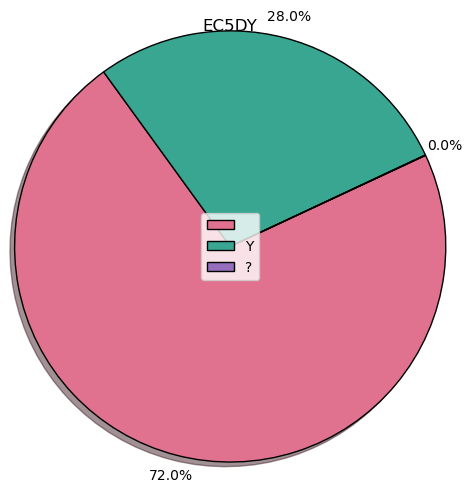

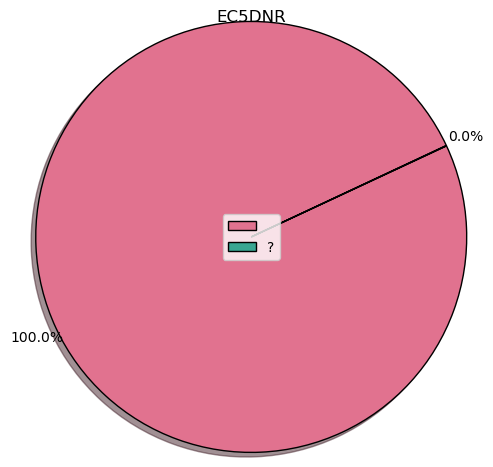

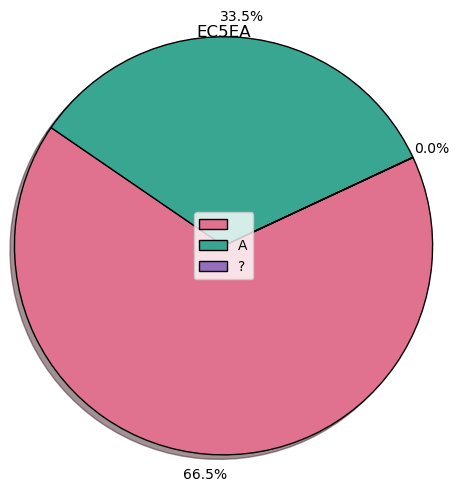

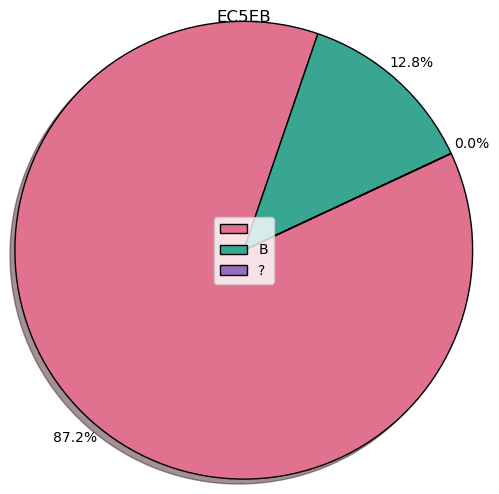

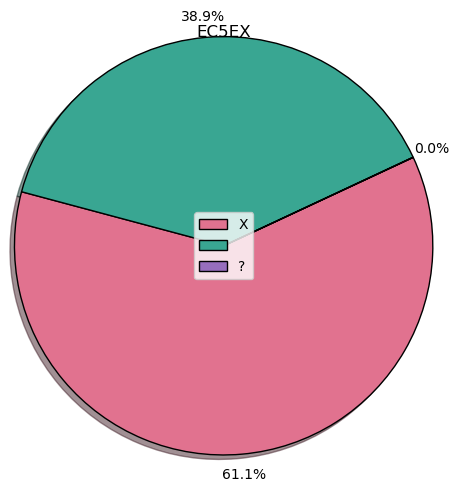

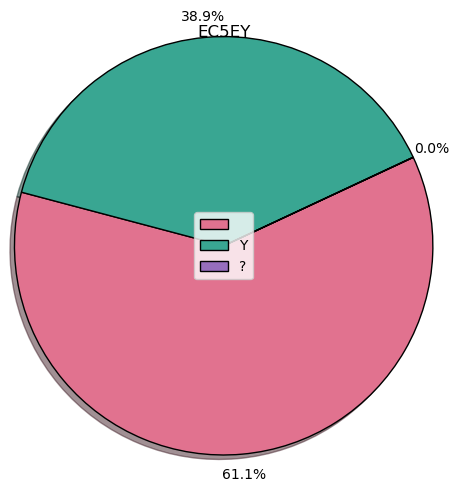

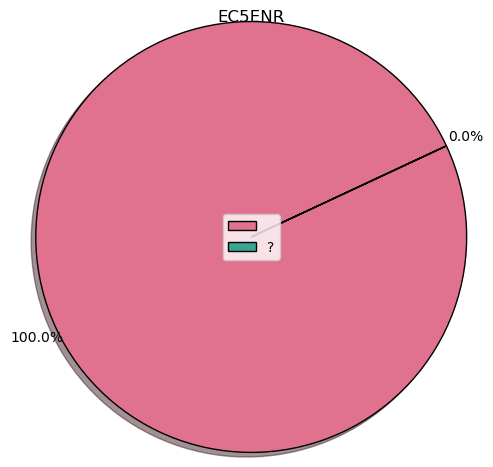

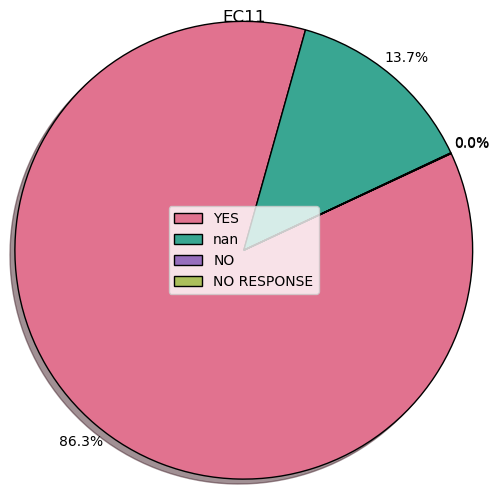

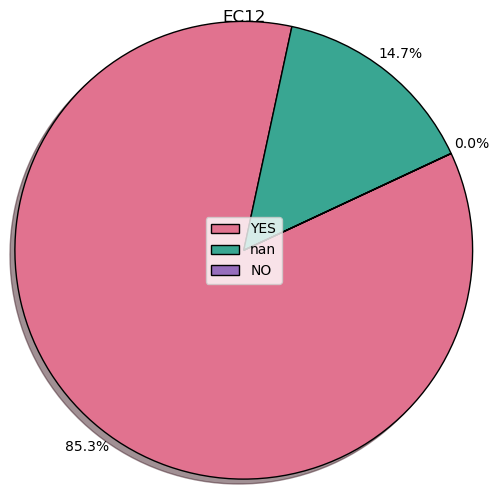

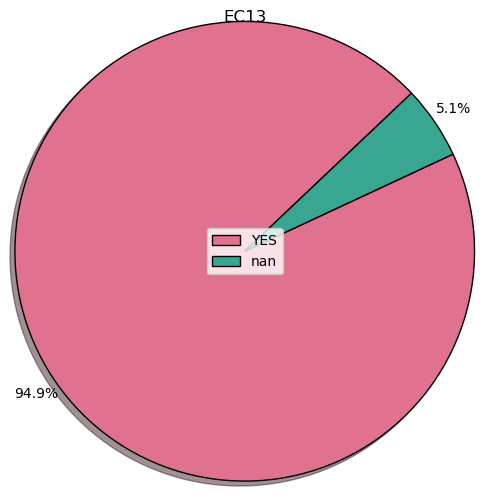

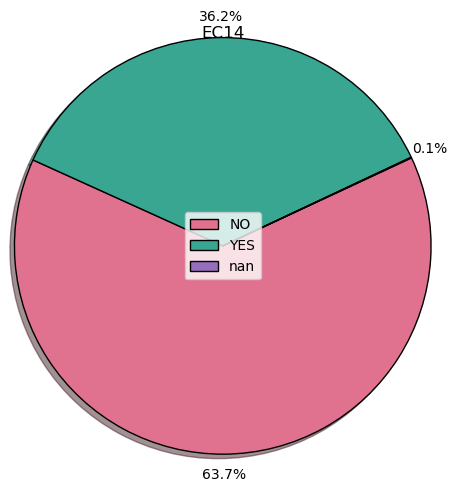

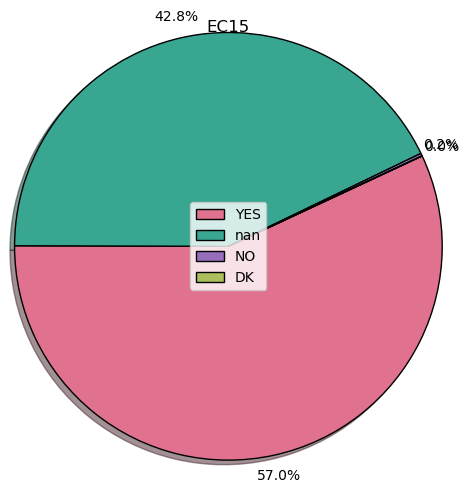

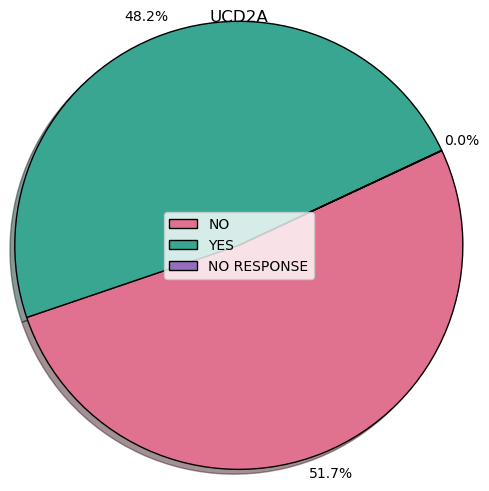

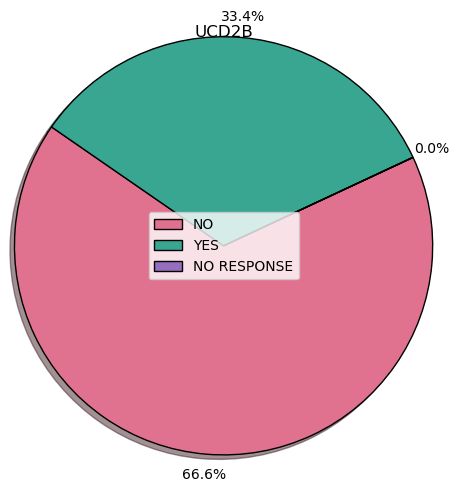

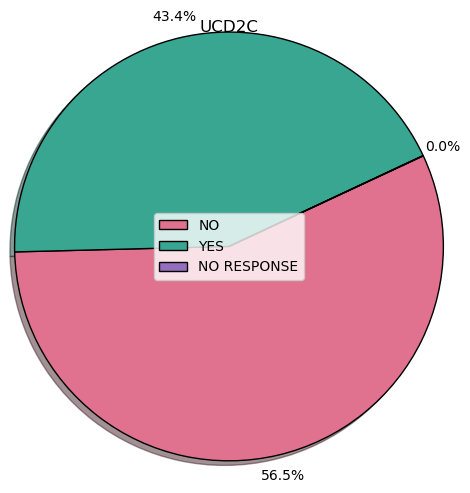

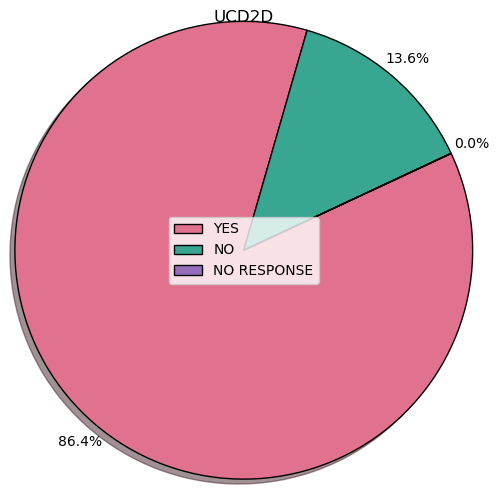

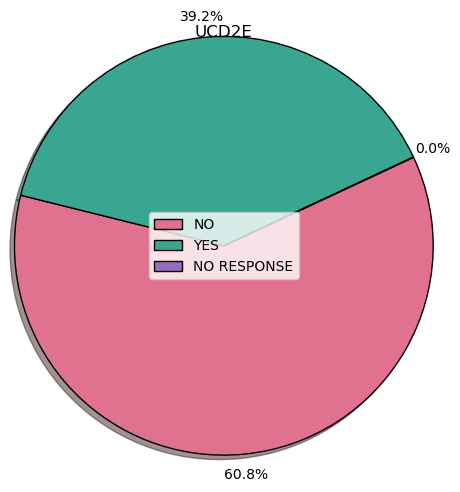

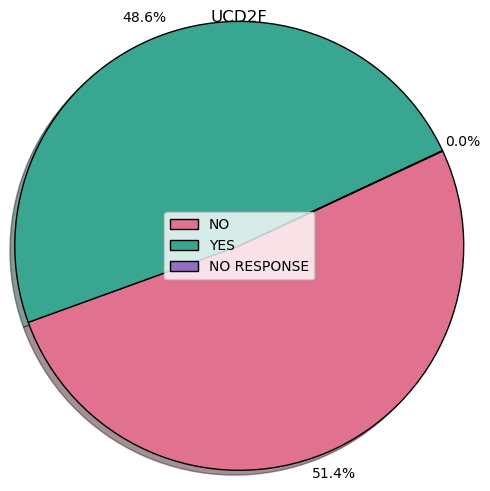

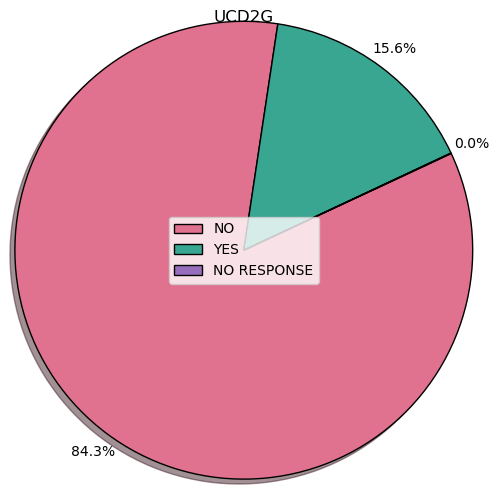

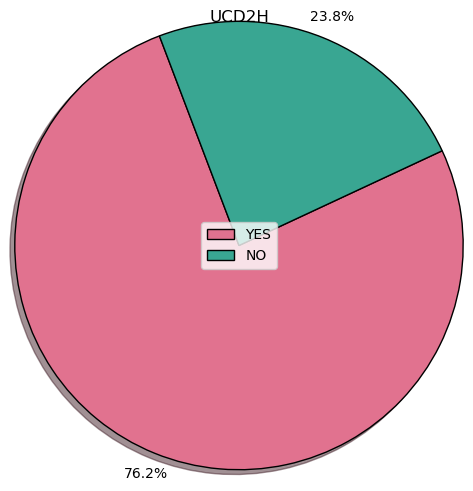

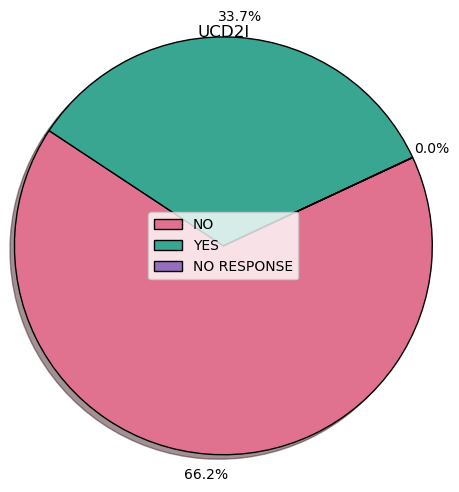

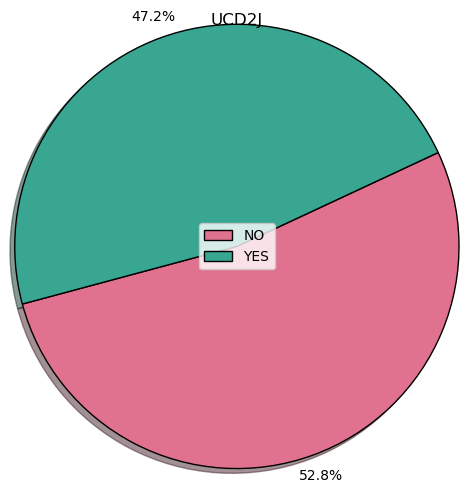

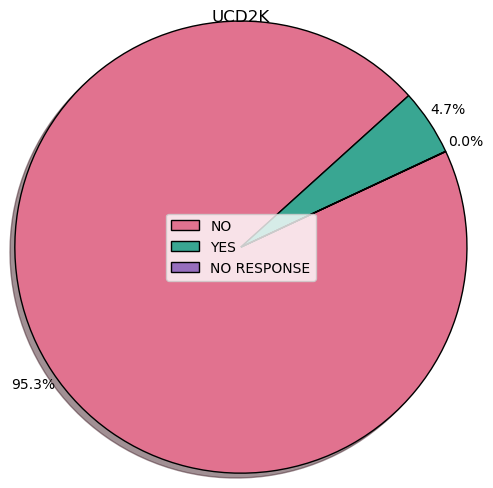

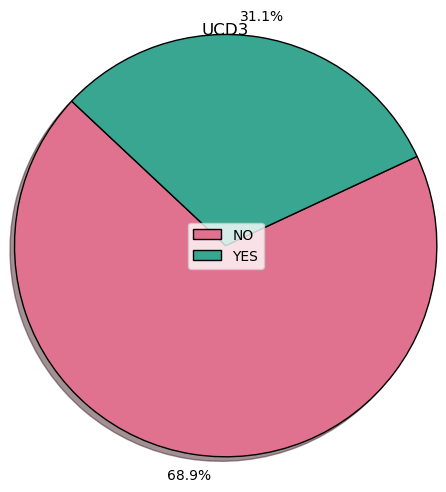

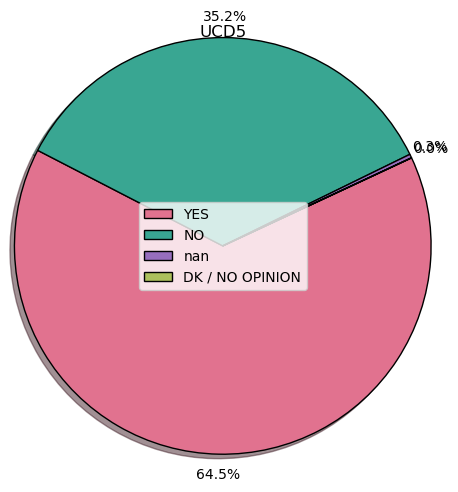

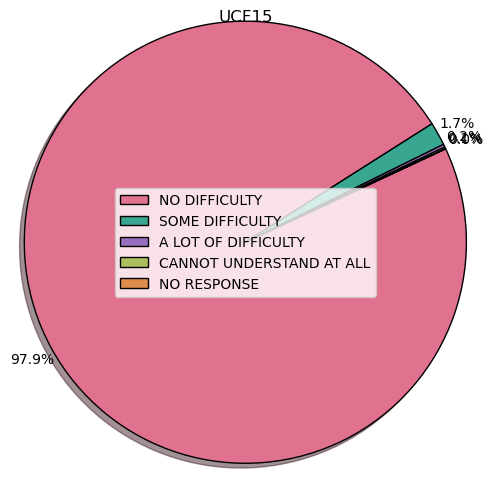

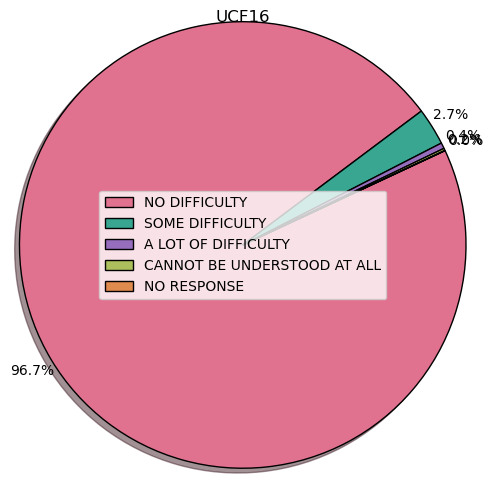

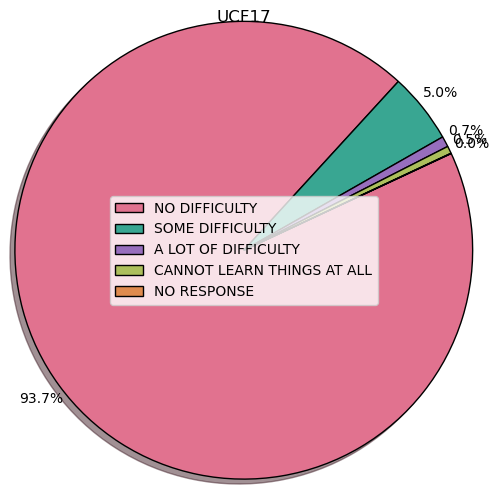

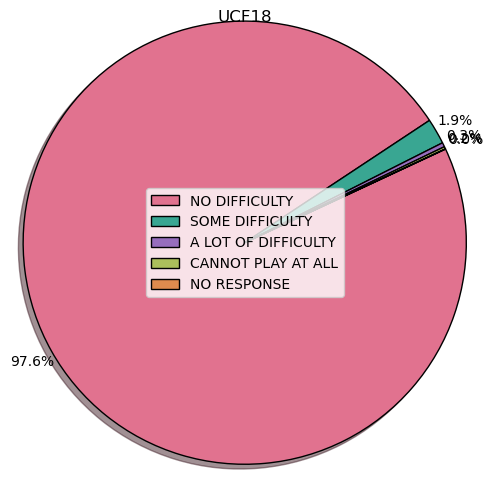

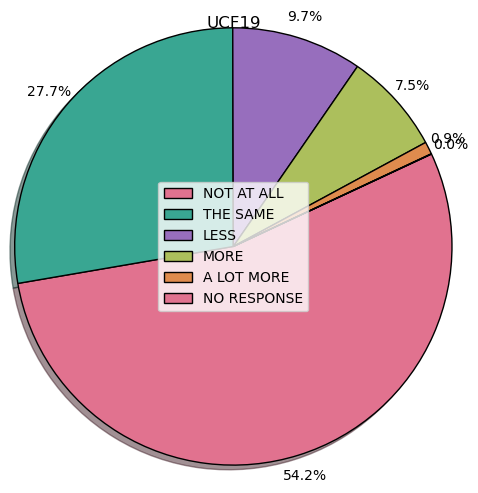

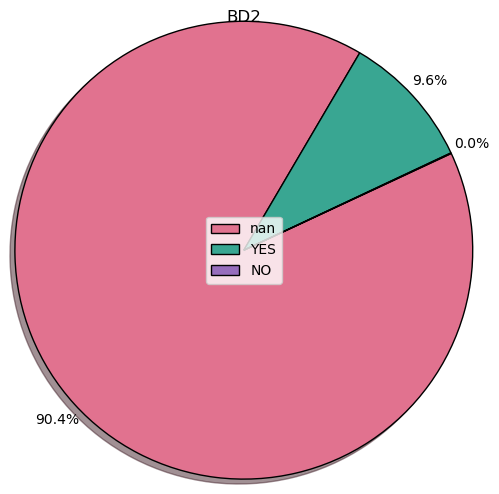

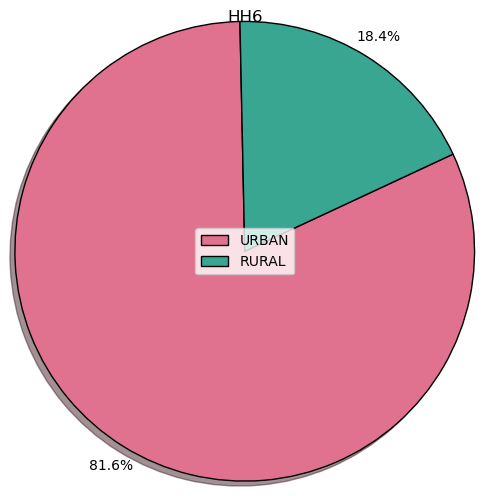

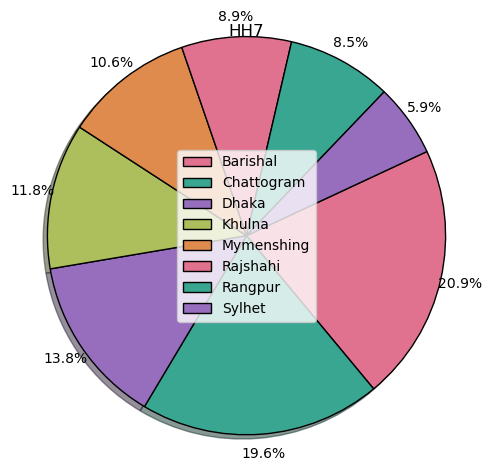

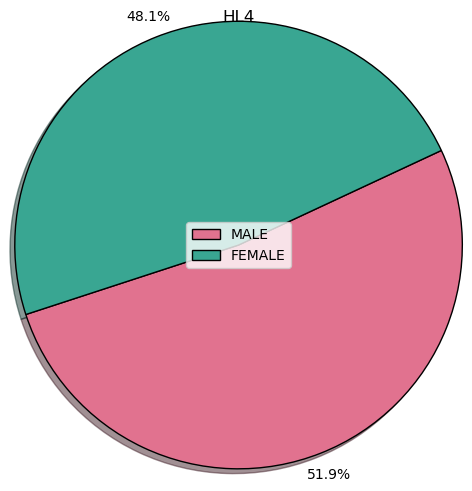

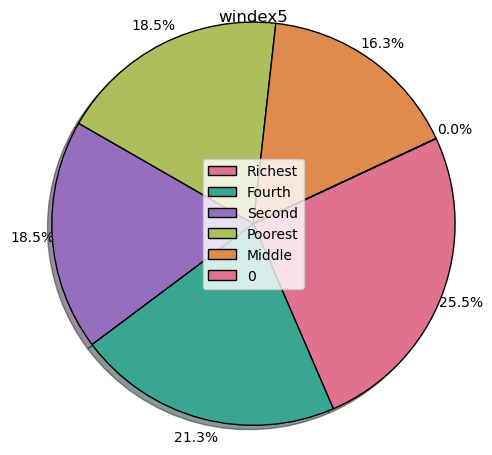

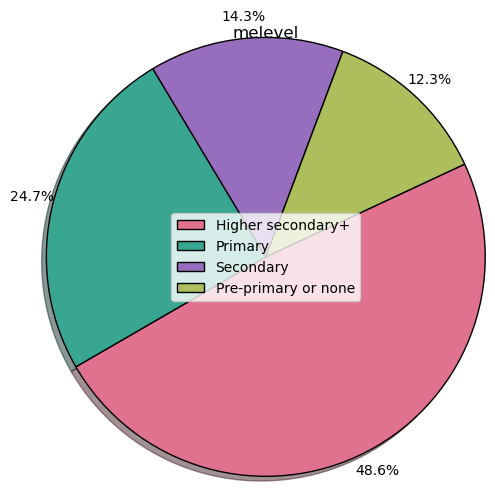

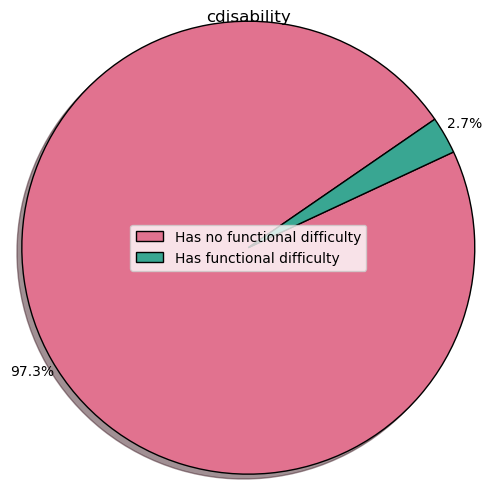

In [27]:
for col in categorical_features.columns:
    columns_failure_type = df1[col].unique().tolist()  # Types of failures

    plt.rcParams["figure.figsize"] = (5,5)
    colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

    plt.pie(df1[col].value_counts(), explode=None, autopct='%.1f%%',
            wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
            pctdistance=1.1, radius=1.3, colors=colors)
    plt.legend(columns_failure_type, loc="center", fontsize=10)

    plt.title(col, fontsize=12)
    plt.tight_layout()
    plt.show()

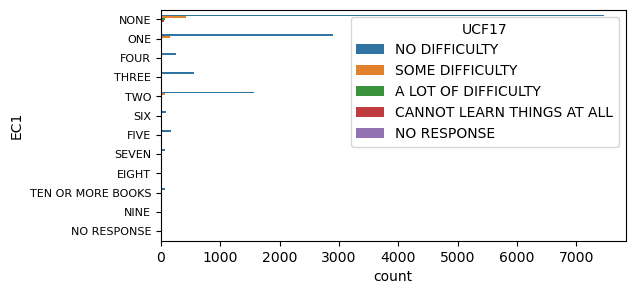

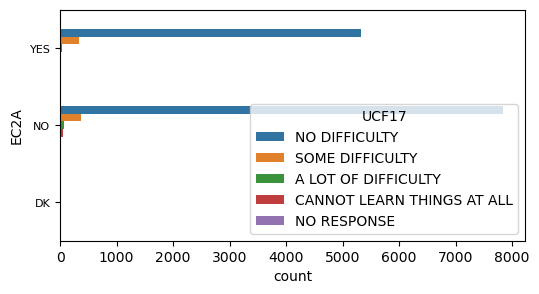

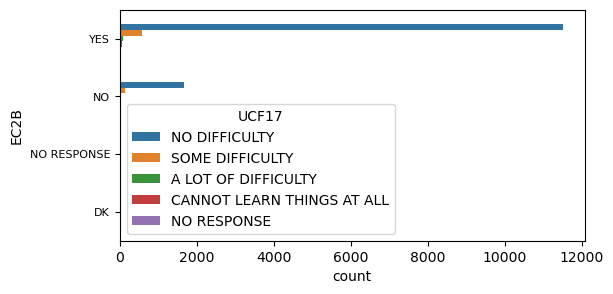

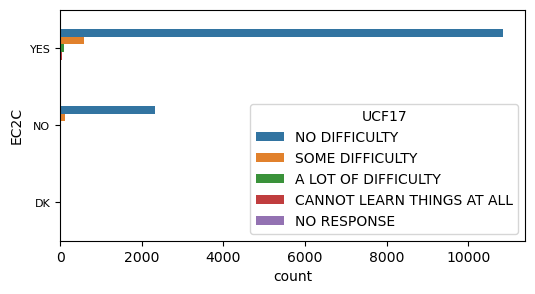

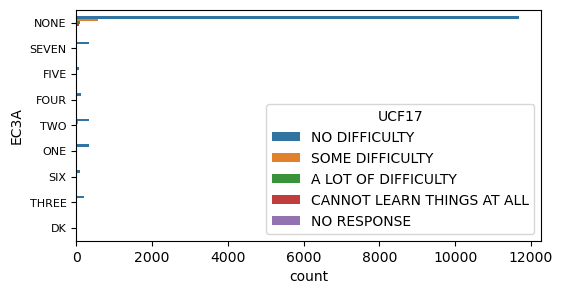

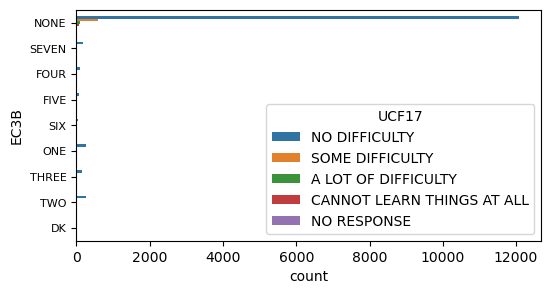

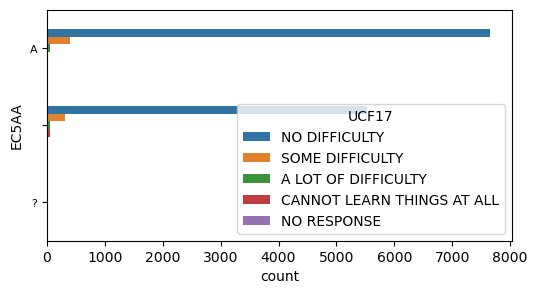

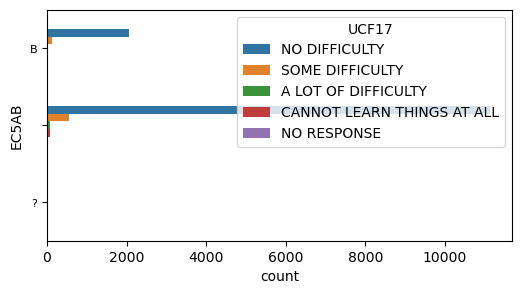

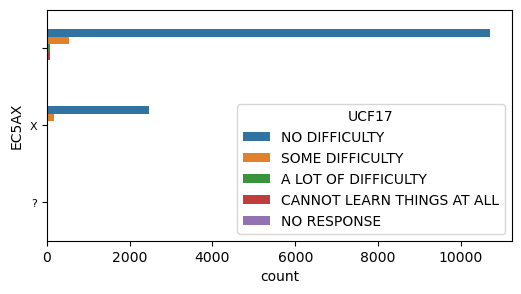

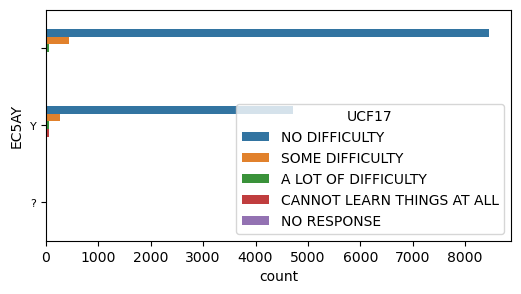

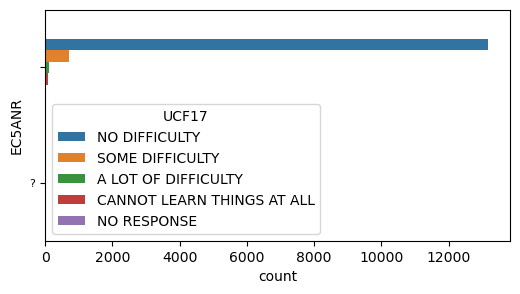

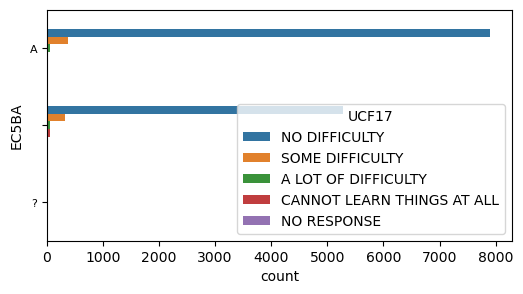

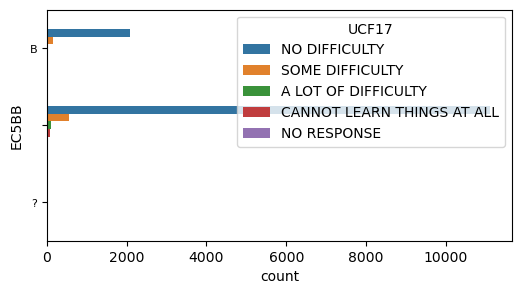

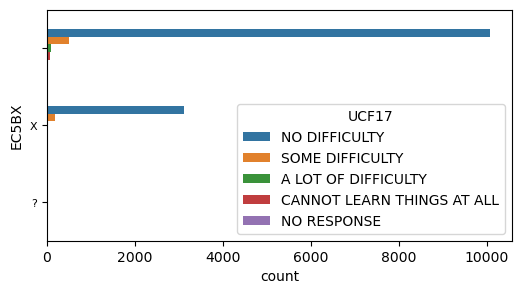

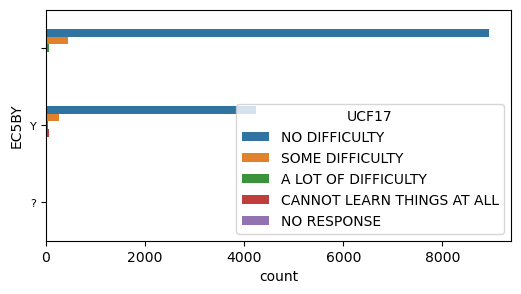

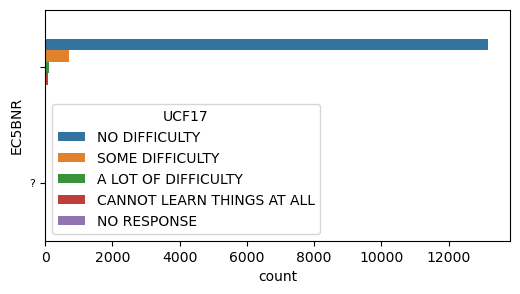

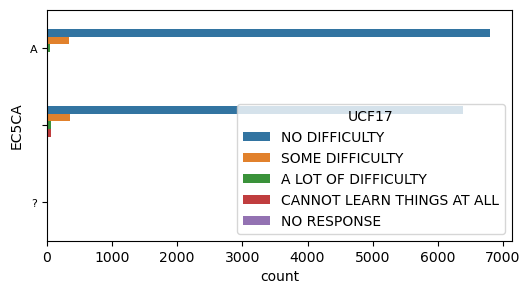

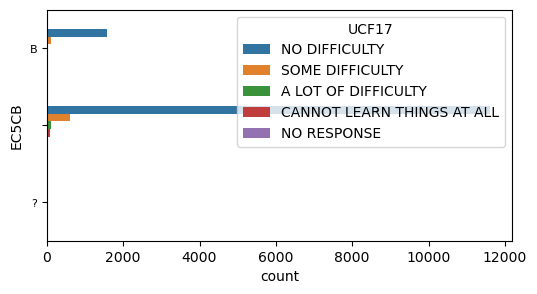

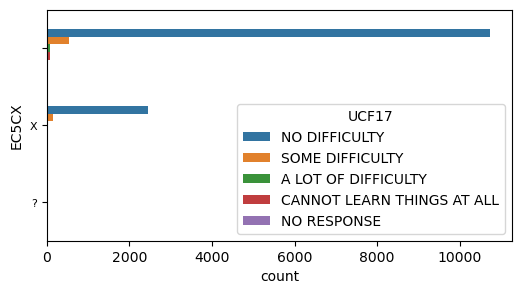

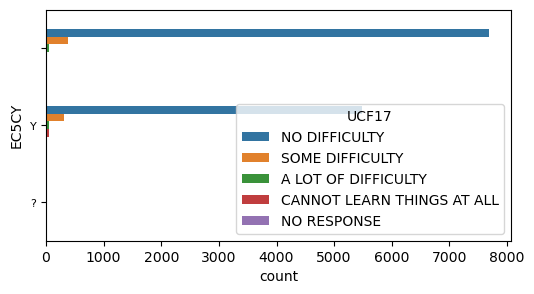

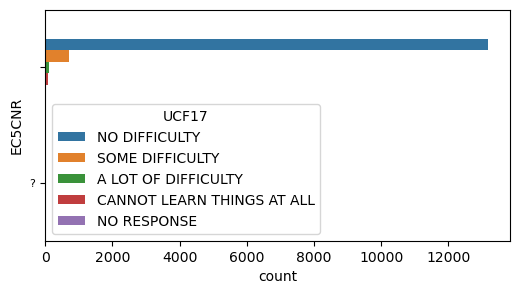

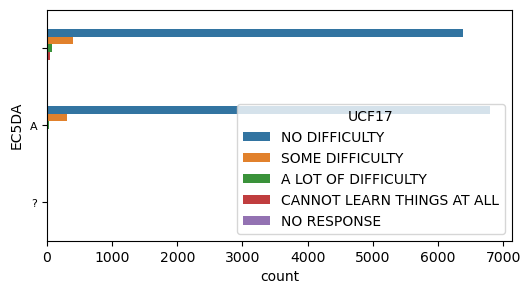

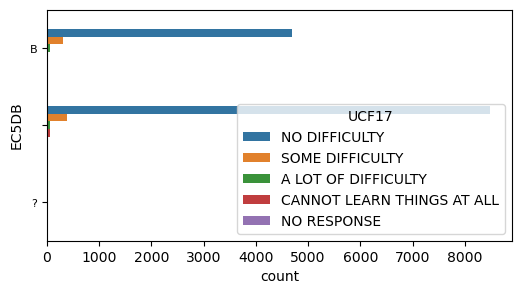

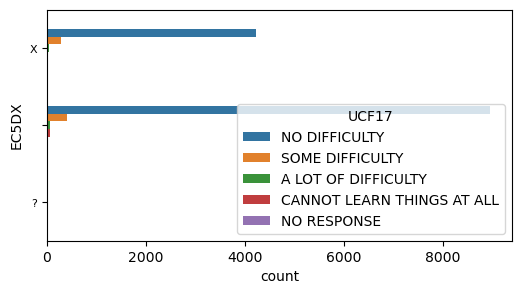

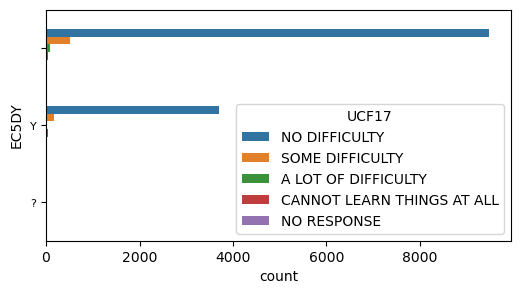

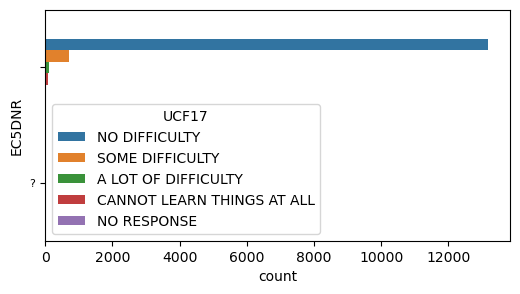

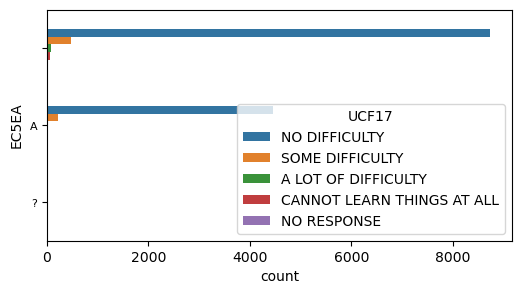

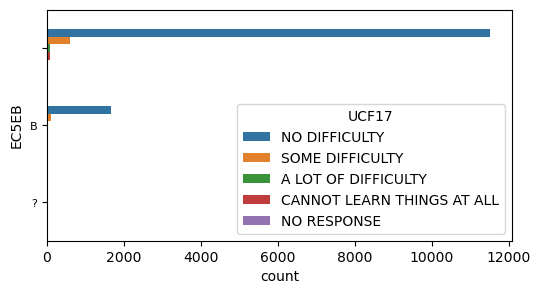

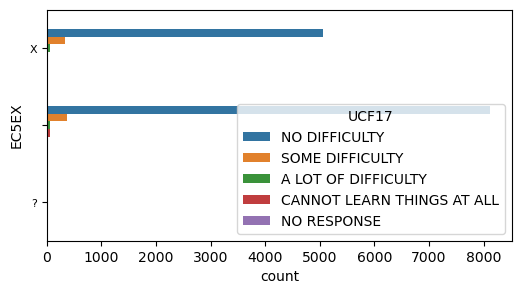

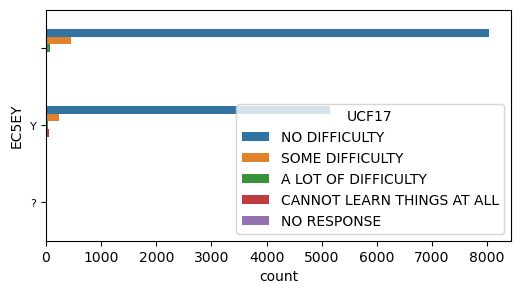

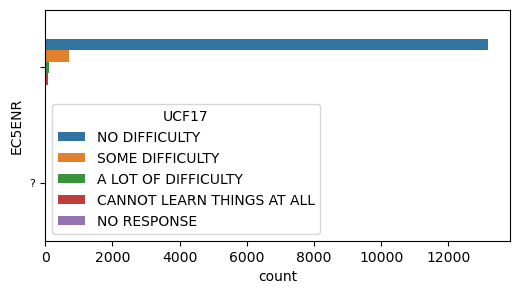

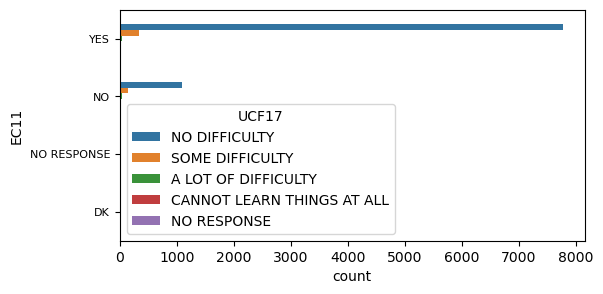

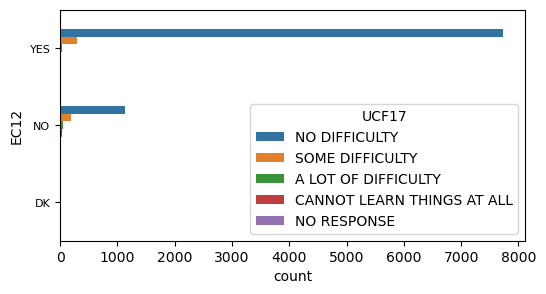

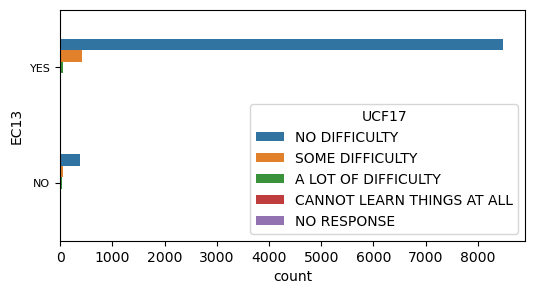

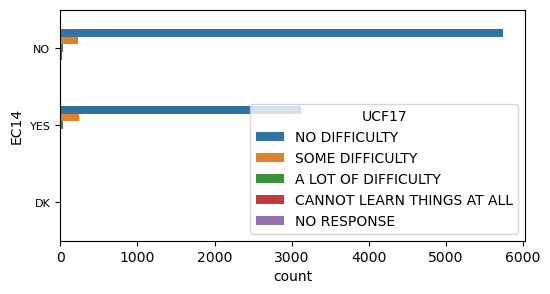

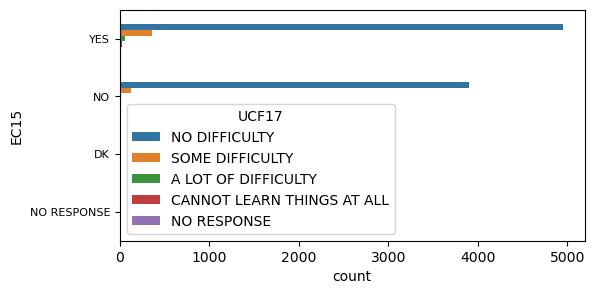

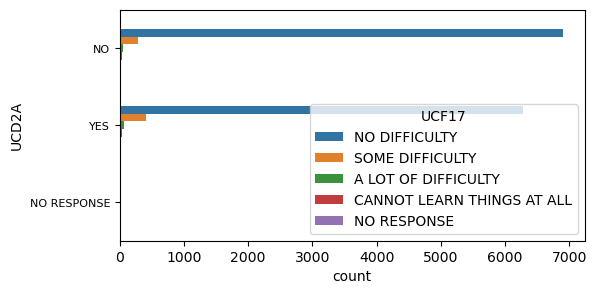

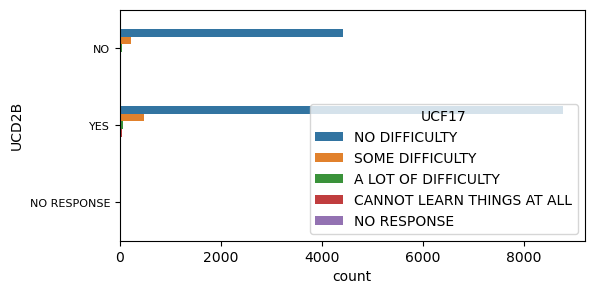

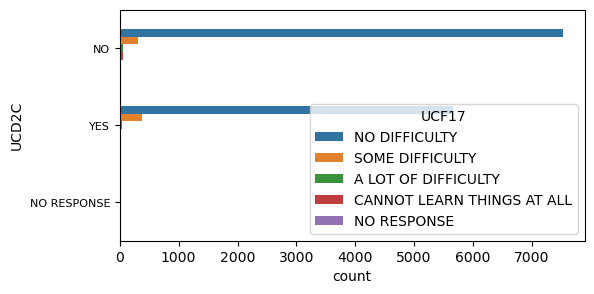

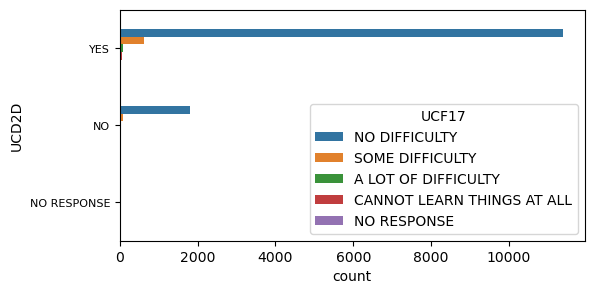

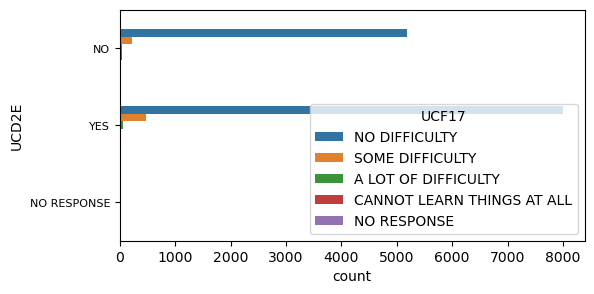

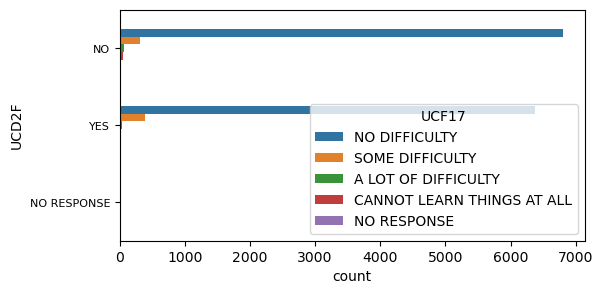

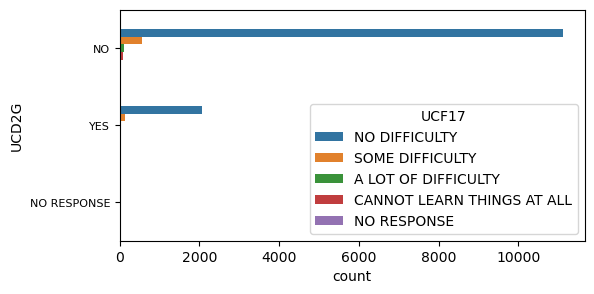

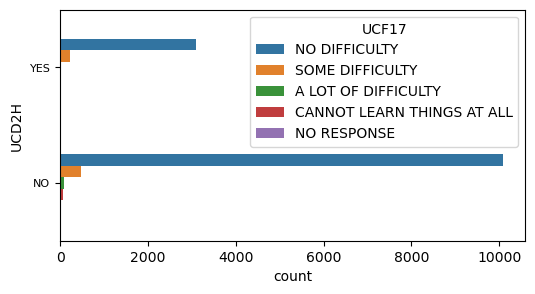

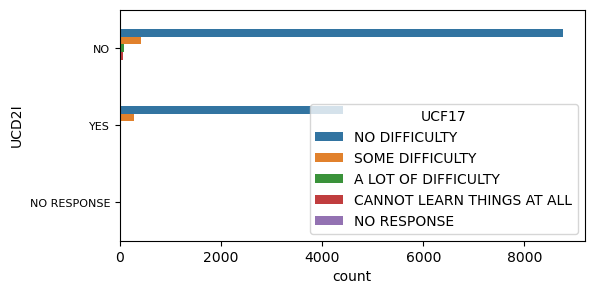

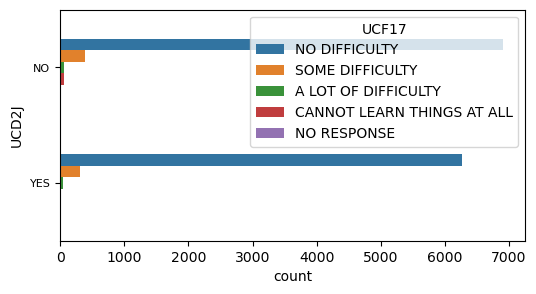

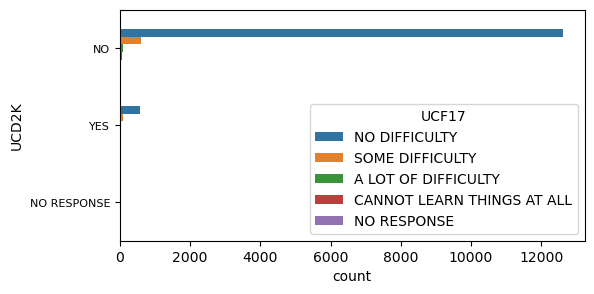

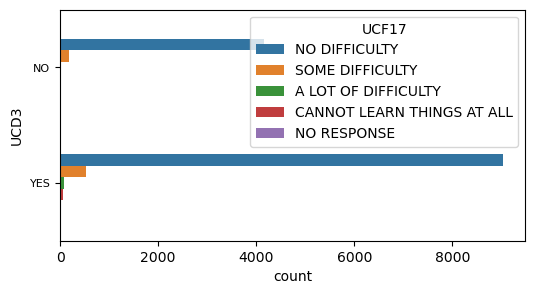

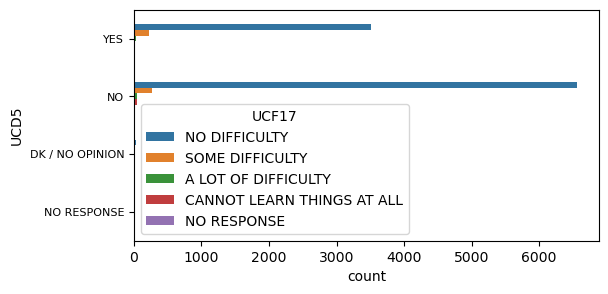

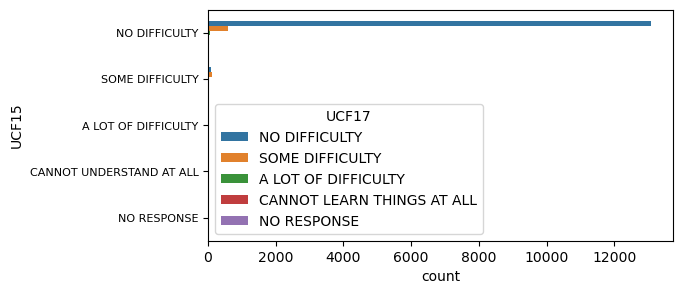

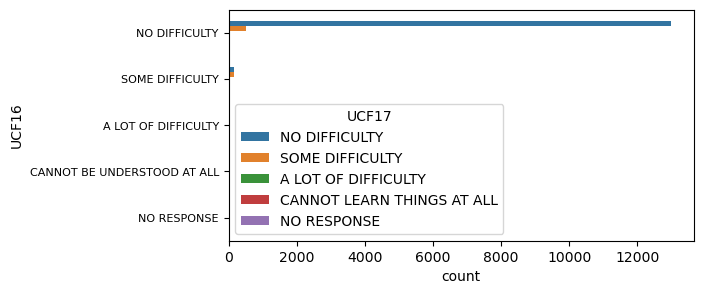

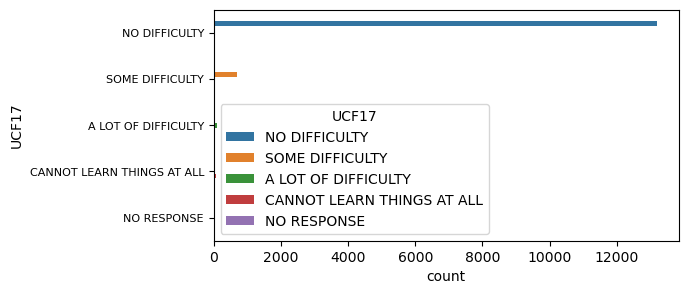

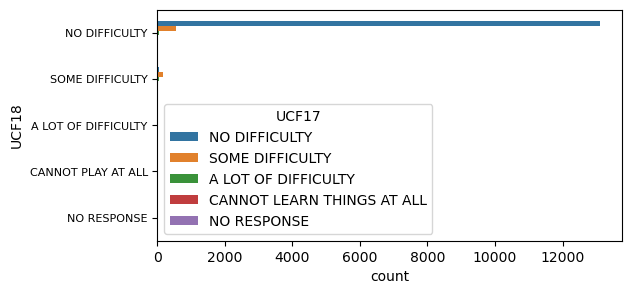

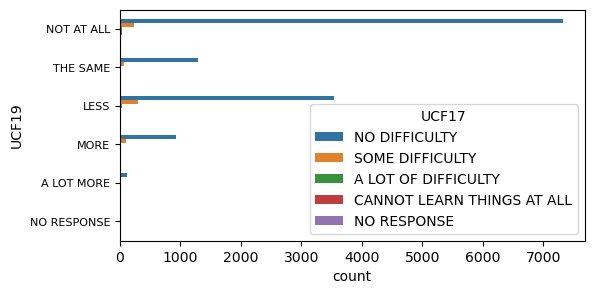

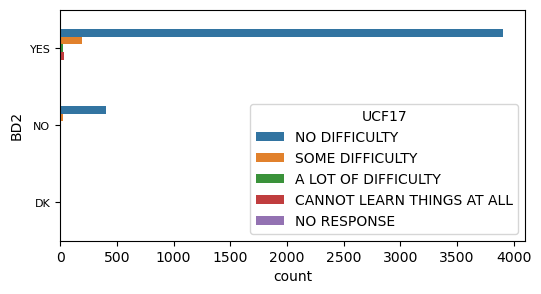

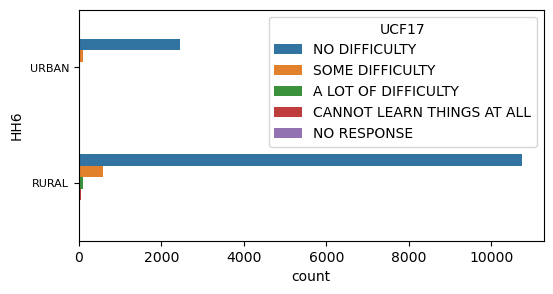

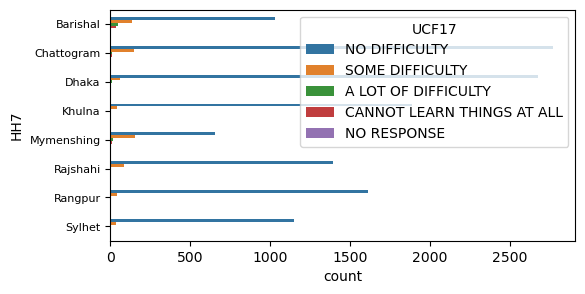

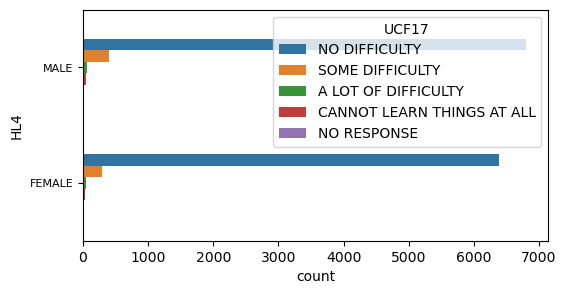

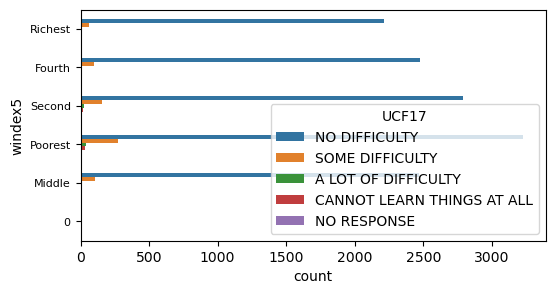

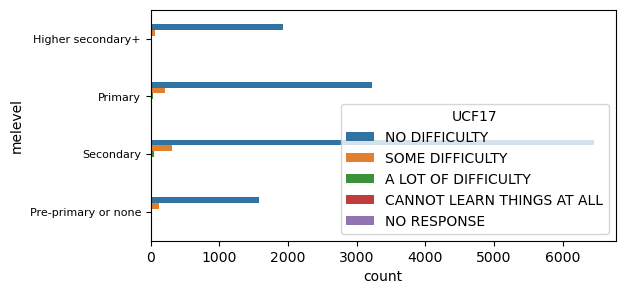

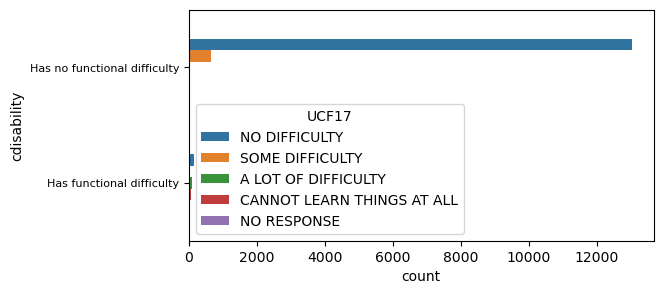

In [28]:
for col in categorical_features.columns:
    plt.figure(figsize=(6,3))
    
    sns.countplot(df1, y=col, hue='UCF17',width=.5)
    plt.xticks(rotation = 0, fontsize=10)
    plt.yticks(rotation = 0, fontsize=8)
    plt.xlabel('count',fontsize=10)
    plt.ylabel(col,fontsize=10)
    plt.show()

### Numerical Data

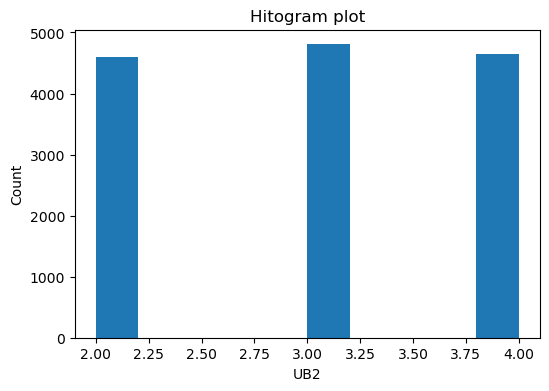

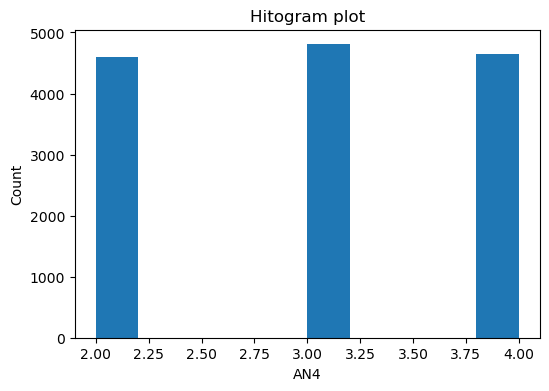

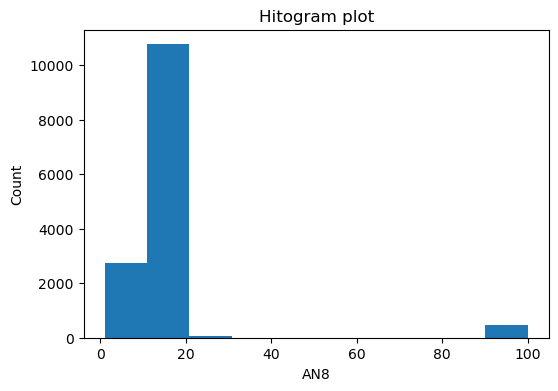

In [29]:
for col in numeric_features.columns:
    plt.figure(figsize = (6,4))
    fig=plt.hist(df1[col]) 
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Hitogram plot")
    plt.show(fig)

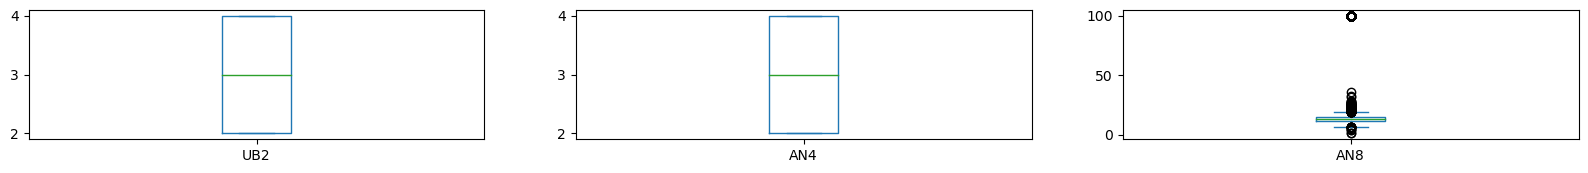

In [30]:
from matplotlib import pyplot

numeric_features.plot(kind='box', subplots=True, layout=(20,3), sharex=False, sharey=False,  figsize=(20, 40))
pyplot.show()

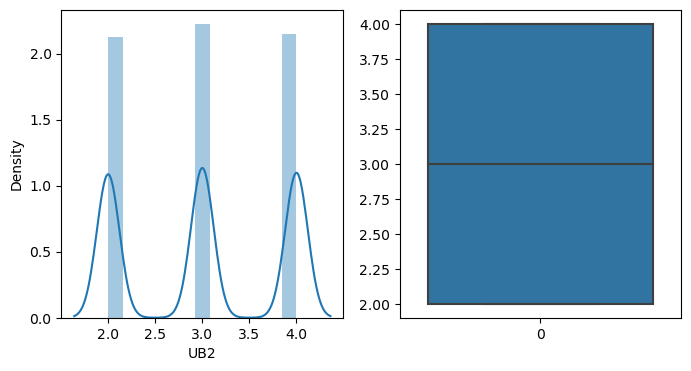

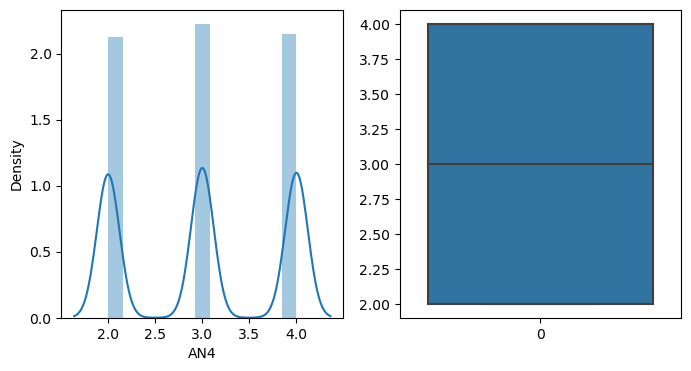

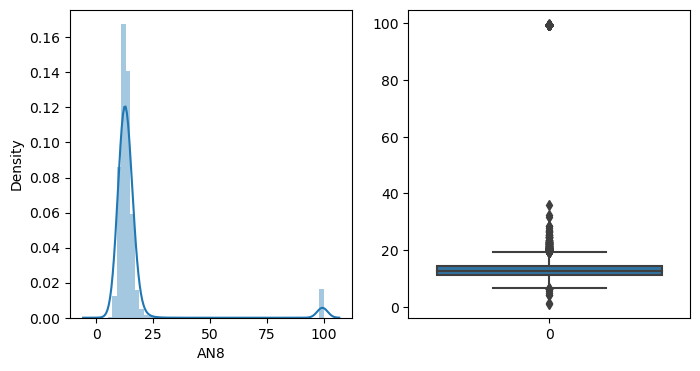

In [31]:
for column in numeric_features:
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.distplot(df1[column])
    plt.subplot(1, 2, 2)
    sns.boxplot(df1[column])

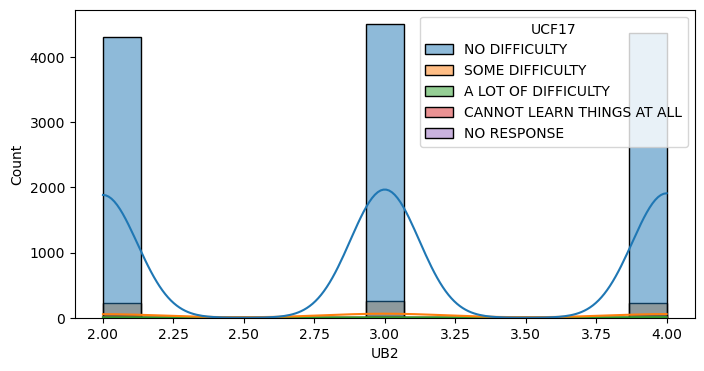

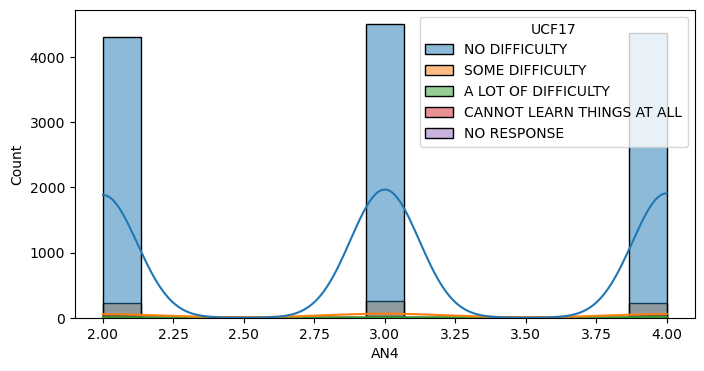

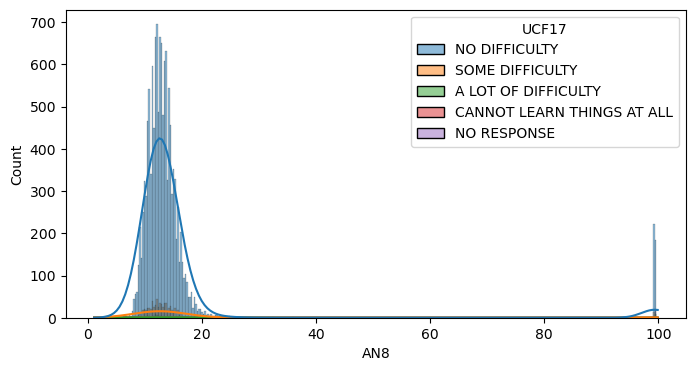

In [32]:
for column in numeric_features.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(x=column, data=df1, kde=True, hue='UCF17')
    plt.show()

In [33]:
import scipy.stats as stat
import pylab 

UB2


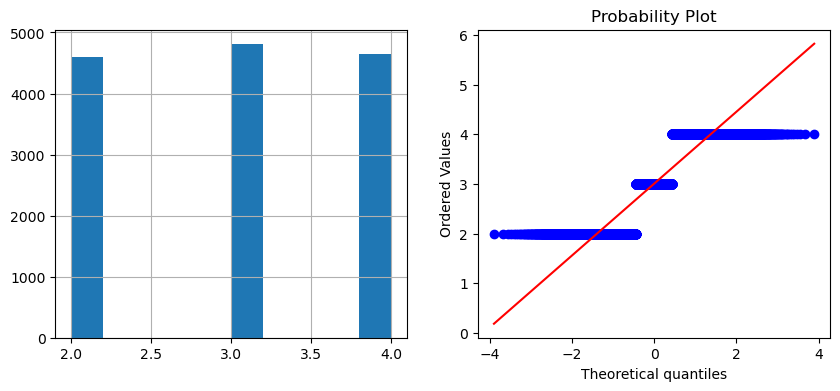

AN4


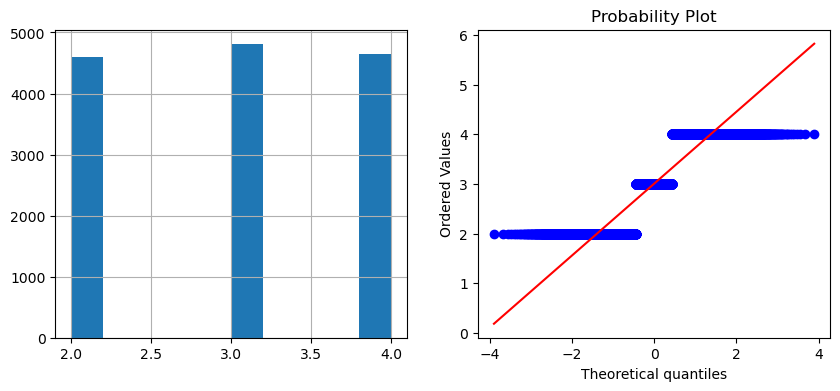

AN8


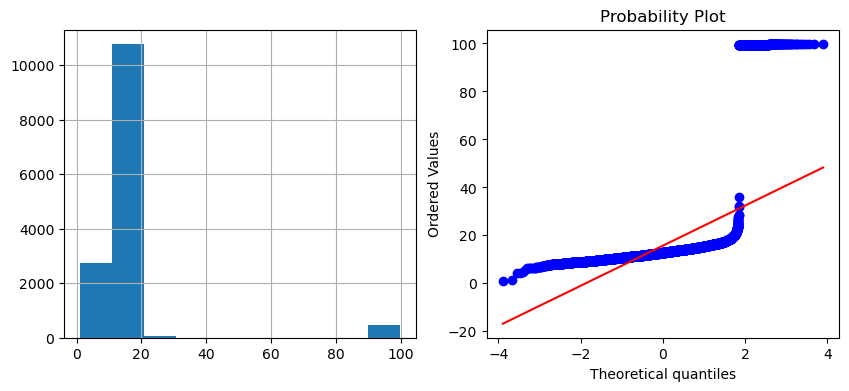

In [34]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    print(feature)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
for column in numeric_features.columns:
    plot_data(df1,column)

Age_exponential


<Figure size 1000x400 with 0 Axes>

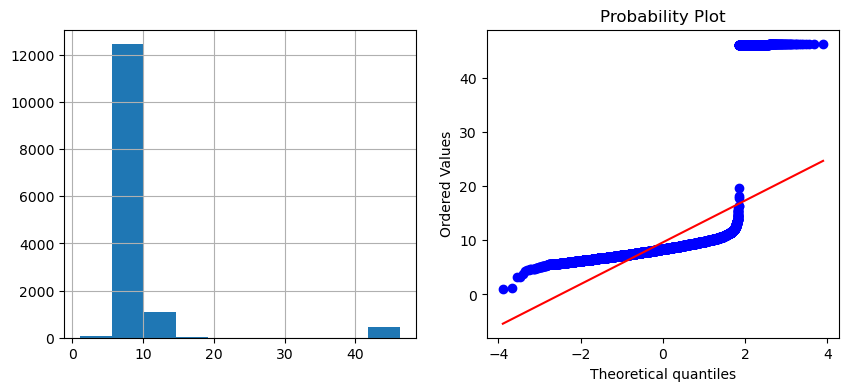

In [35]:
#### Exponential Transdormation
df1['Age_exponential']=df1['AN8']**(1/1.2)
plt.figure(figsize=(10,4))
plot_data(df1,'Age_exponential')

<Axes: >

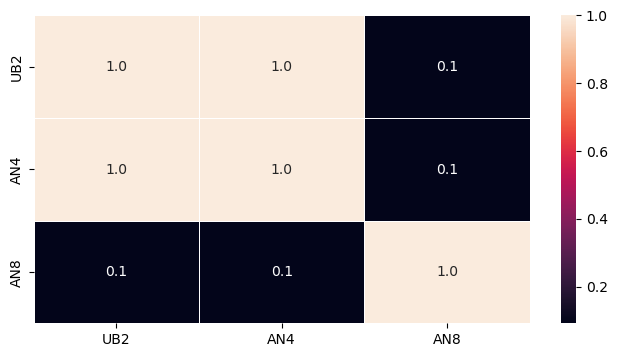

In [36]:
#correlation map
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(numeric_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [37]:
cormat = numeric_features.corr()
round(cormat,2)

UB2   AN4   AN8
UB2  1.00  1.00  0.09
AN4  1.00  1.00  0.09
AN8  0.09  0.09  1.00

In [38]:
co_matrix = numeric_features.corr()

def correlation(df1, threshold):
    threshold=abs(threshold)
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(numeric_features, 0.9)
print('correlated features: ', len(set(corr_features)) )
corr_features


correlated features:  1


{'AN4'}